In [17]:
library(tidyverse)
library(modelr)

In [18]:
library(showtext)
font_add("nanum", "NanumGothic.ttf")
showtext_auto()

```
ggplot(data = <데이터> + 
       <geom함수>(mapping = aes(<매핑모음>))
```

### ggplot2
- geom_line() : 선 그래프
- geom_point() : 점 표시, 산점도
- geom_smooth() : 스무스 그래프
- geom_histogram() : 히스토그램
- geom_bar(stat = "identity") : 막대 그래프
- geom_col : 막대 그래프
- geom_tile() : 타일 막대 그래프
- geom_raster() : 격자형 그래프
- geom_text() : 텍스트 표현
- geom_area() : 영역 그래프
- geom_path() : 순서 연결 그래프
- geom_polygon() : 다각형 그래프

## geom_point() : 산점도
### aes()
- x, y 
- color : 색상
- shape : 모양
- alpha : 선명도

### 인자를 aes()안에 미포함시 전체 적용

Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."
Warning message:
"Removed 62 rows containing missing values (geom_point)."


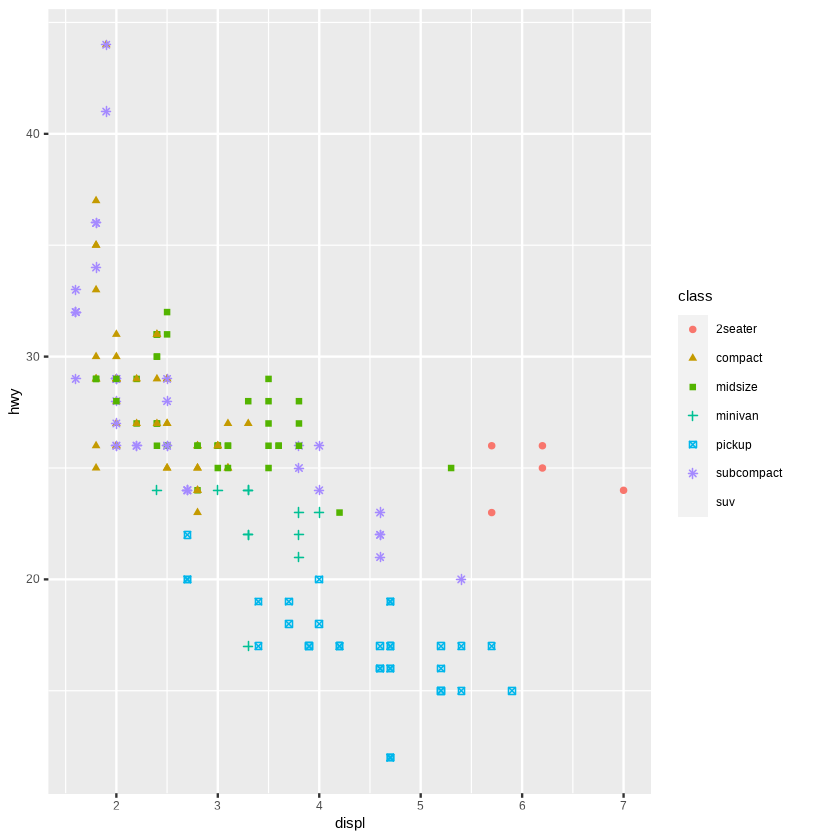

In [111]:
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy, color = class, shape = class))

Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."
Warning message:
"Removed 62 rows containing missing values (geom_point)."


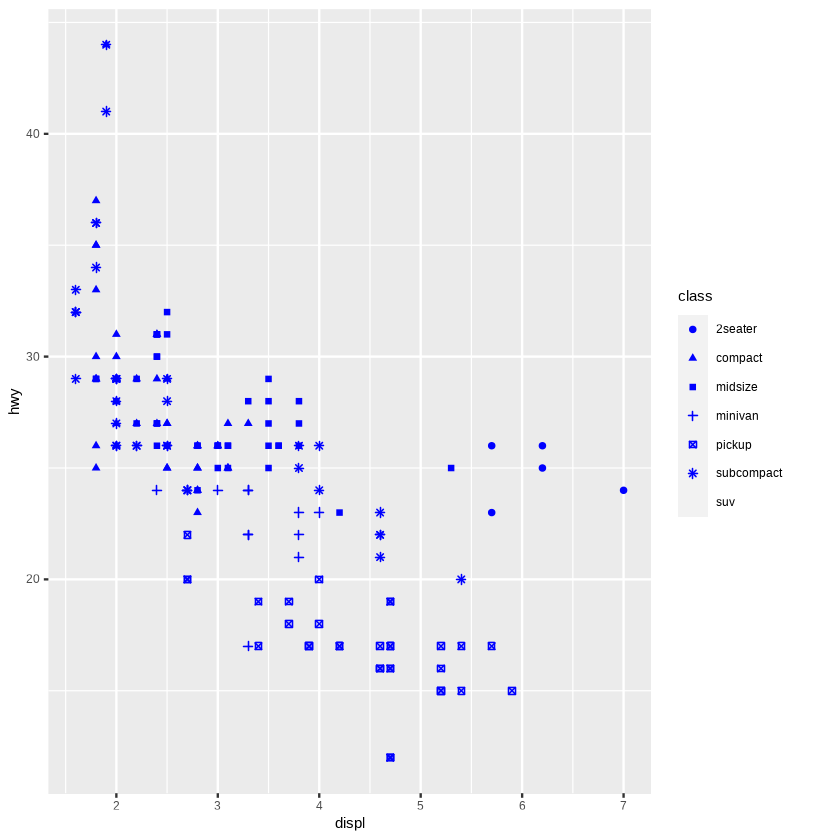

In [112]:
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy, shape = class), color = "blue")

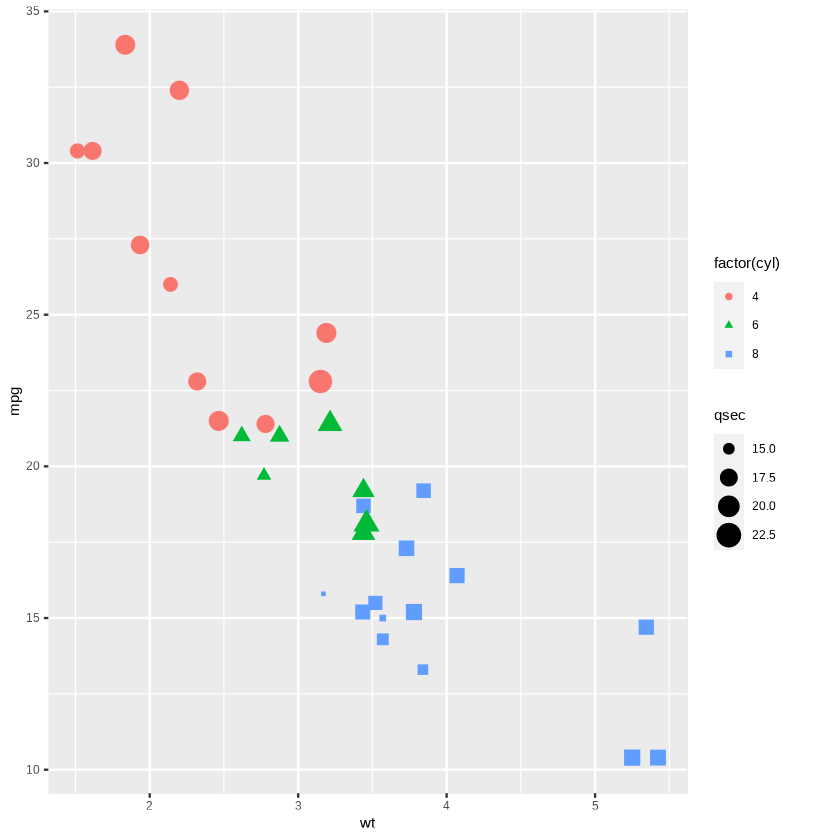

In [119]:
ggplot(mtcars, aes(wt, mpg)) +
    geom_point(aes(colour = factor(cyl),  
                   shape = factor(cyl),  
                   size = qsec))  

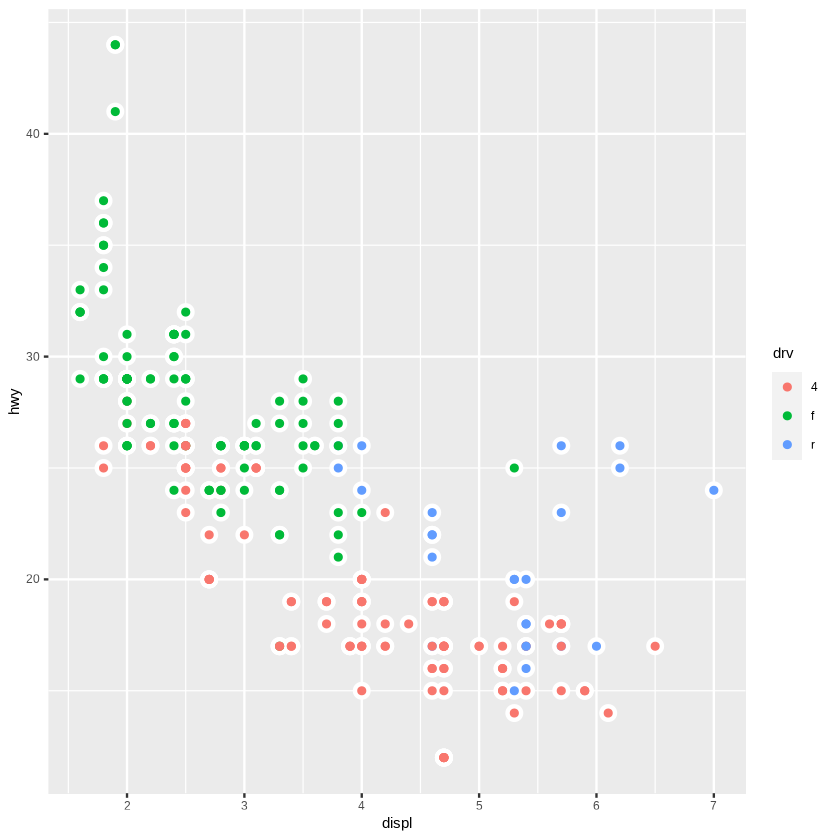

In [129]:
ggplot(mpg, aes(displ, hwy)) + geom_point(color = "white", size = 4) + 
geom_point(aes(colour = drv))

## geom_line() : 선 그래프
### aes()
- x, y 
- color : 색상
- shape : 모양
- alpha : 선명도
- group : group별로 표시
- linetype : 선의 종류

### geom_line(colour, size, linetype)
- colour : 선의 색상
- size : 선의 굵기
- linetype : 선의 종류 (1 : 실선 / 2 : 선이 긴 점선 / 3 : 선이 짧은 점선 / 4 : 선이 길고 짧음이 반복되는 점선)

### 인자를 aes()안에 미포함시 전체 적용

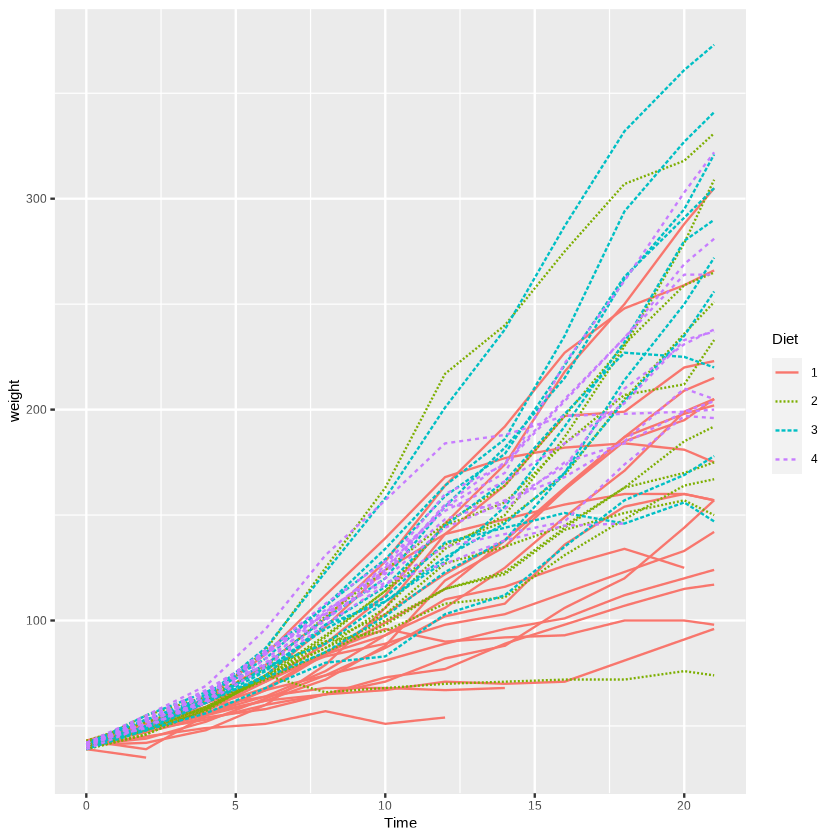

In [126]:
ggplot(ChickWeight, aes(x = Time, y = weight, colour = Diet, group = Chick)) +
    geom_line(aes(linetype = Diet))

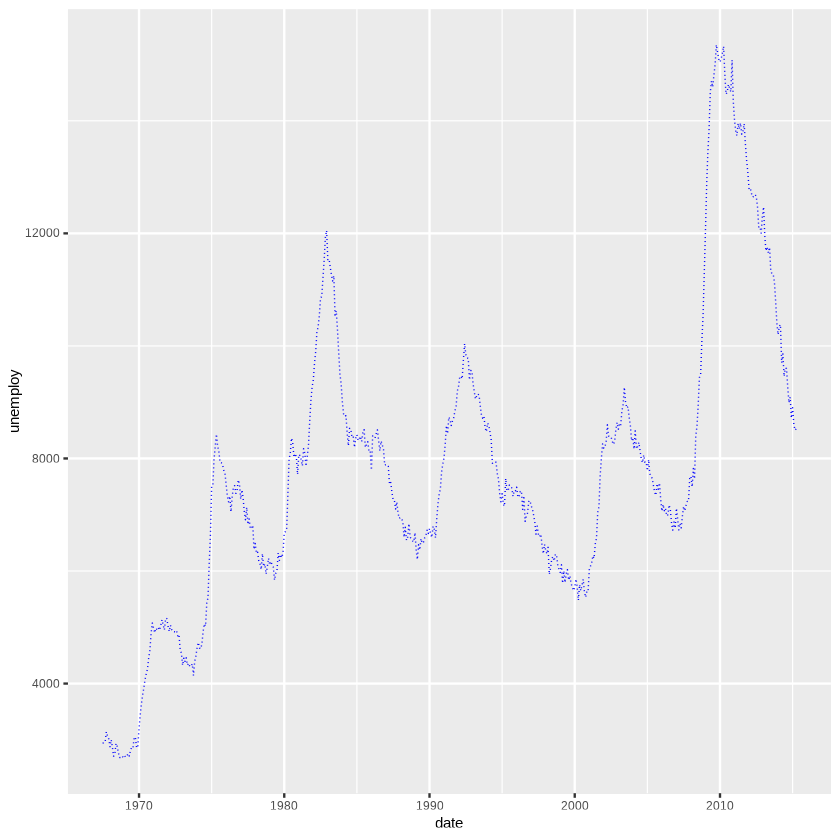

In [114]:
b = ggplot(economics, aes(x = date, y = unemploy))
b + geom_line(colour = "blue", 
              size = 0.3,  
              linetype = 3)

## geom_smooth() : 스무스 그래프

### aes()
- x, y 
- color : 색상
- shape : 모양
- alpha : 선명도
- group : group별로 표시
- linetype : 선의 종류

### geom_smooth()
- show.legend = F : 범례 미표시
- sd = F : 신뢰구간 미표시

### 인자를 aes()안에 미포함시 전체 적용

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



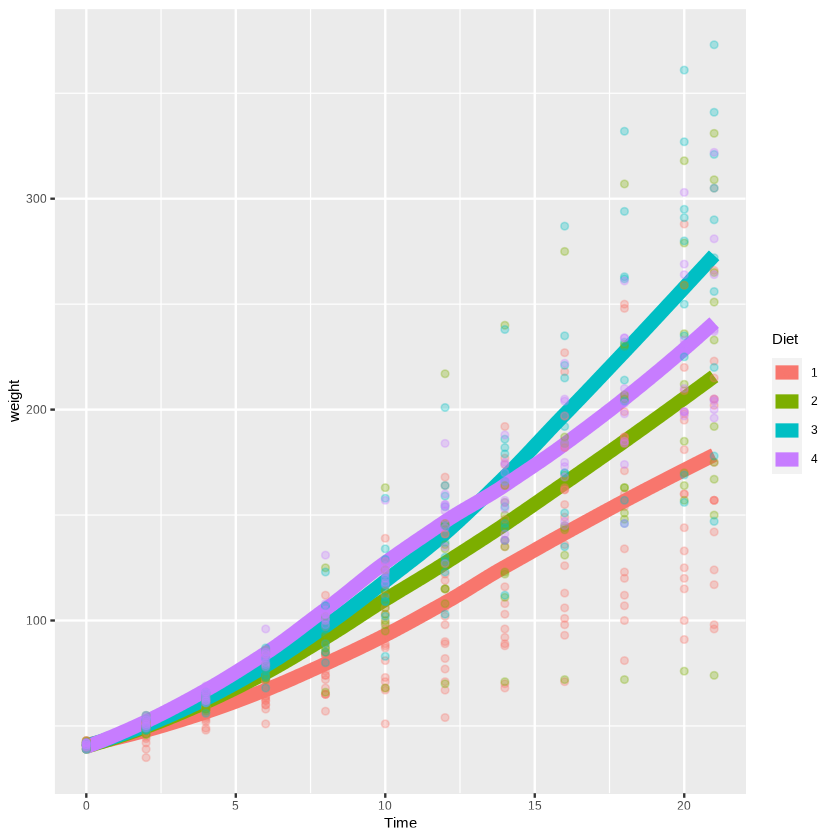

In [128]:
ggplot(ChickWeight, aes(x = Time, y = weight, colour = Diet)) + 
    geom_smooth(alpha = 0.4, size = 3, se = F) + 
    geom_point(alpha = 0.3)

### 라벨
### labs
- title = 제목
- subtitle = 제목 아래 부제
- caption = 오른족 하단의 텍스트
- x : x축 제목
- y : y축 제목
- color : 범례 제목

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



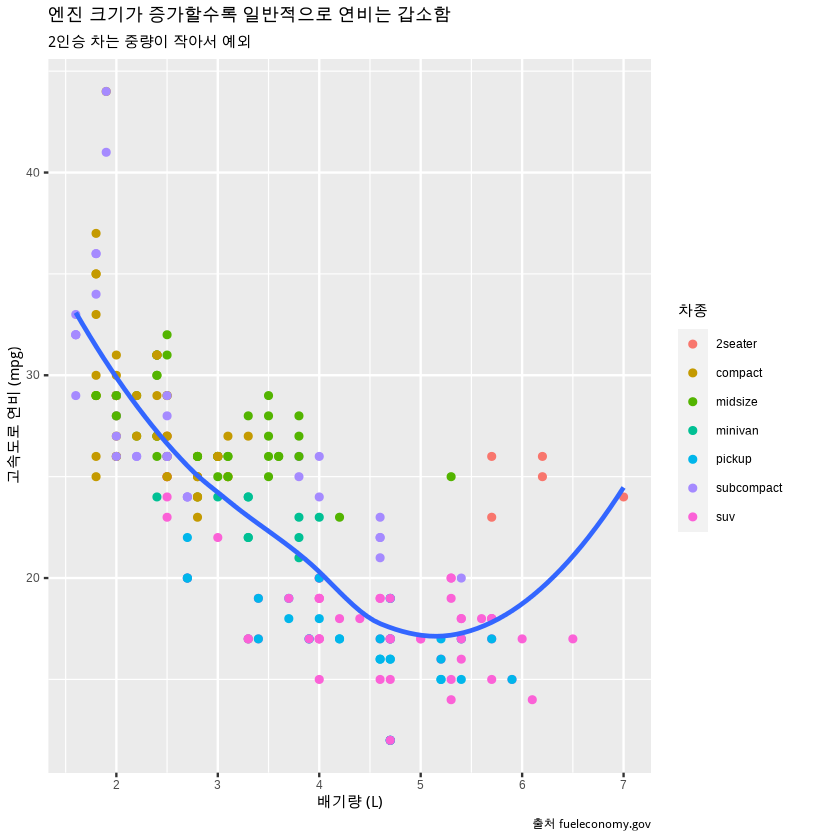

In [10]:
ggplot(mpg, aes(displ, hwy)) + 
    geom_point(aes(color = class)) + 
    geom_smooth(se = F) + 
    labs(
        title = "엔진 크기가 증가할수록 일반적으로 연비는 갑소함",
        subtitle = "2인승 차는 중량이 작아서 예외",
        caption = "출처 fueleconomy.gov",
        x = "배기량 (L)",
        y = "고속도로 연비 (mpg)",
        color = "차종"
    )

- quote() : 수식 입력

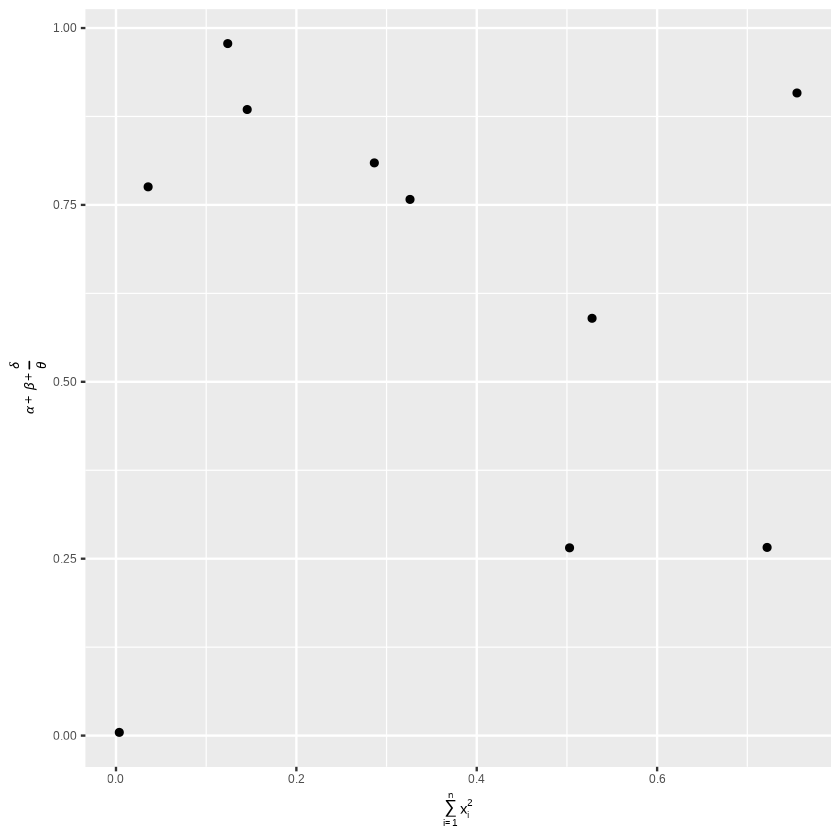

In [11]:
df <- tibble(
    x = runif(10),
    y = runif(10)
)
ggplot(df, aes(x, y)) +
    geom_point() + 
    labs(
        x = quote(sum(x[i] ^ 2, i == 1, n)),
        y = quote(alpha + beta + frac(delta, theta))
    )

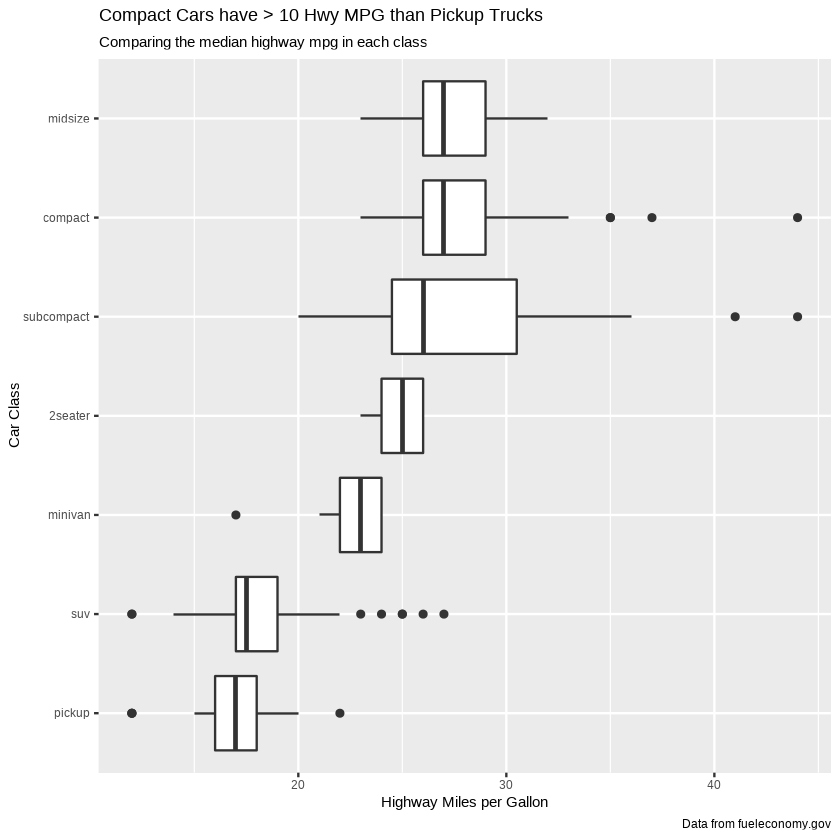

In [12]:
# 22.2.1
ggplot(
  data = mpg,
  mapping = aes(x = fct_reorder(class, hwy), y = hwy)
) +
  geom_boxplot() +
  coord_flip() +
  labs(
    title = "Compact Cars have > 10 Hwy MPG than Pickup Trucks",
    subtitle = "Comparing the median highway mpg in each class",
    caption = "Data from fueleconomy.gov",
    x = "Car Class",
    y = "Highway Miles per Gallon"
  )

`geom_smooth()` using formula 'y ~ x'



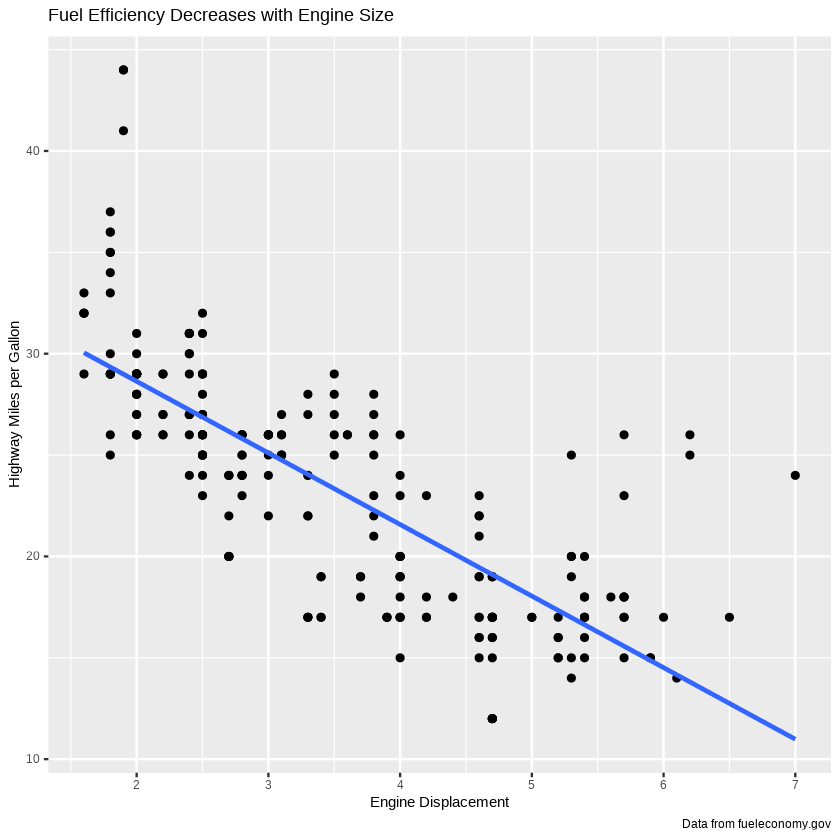

In [13]:
# 3
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Fuel Efficiency Decreases with Engine Size",
    caption = "Data from fueleconomy.gov",
    y = "Highway Miles per Gallon",
    x = "Engine Displacement"
  )
#> `geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



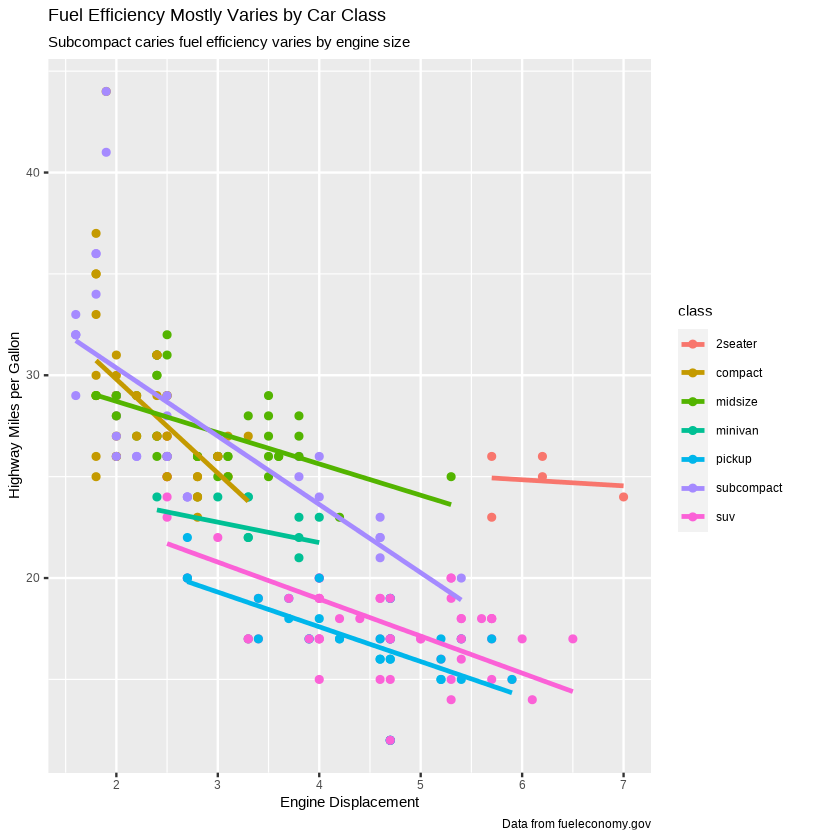

In [14]:
ggplot(mpg, aes(displ, hwy, colour = class)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Fuel Efficiency Mostly Varies by Car Class",
    subtitle = "Subcompact caries fuel efficiency varies by engine size",
    caption = "Data from fueleconomy.gov",
    y = "Highway Miles per Gallon",
    x = "Engine Displacement"
  )

`geom_smooth()` using formula 'y ~ x'



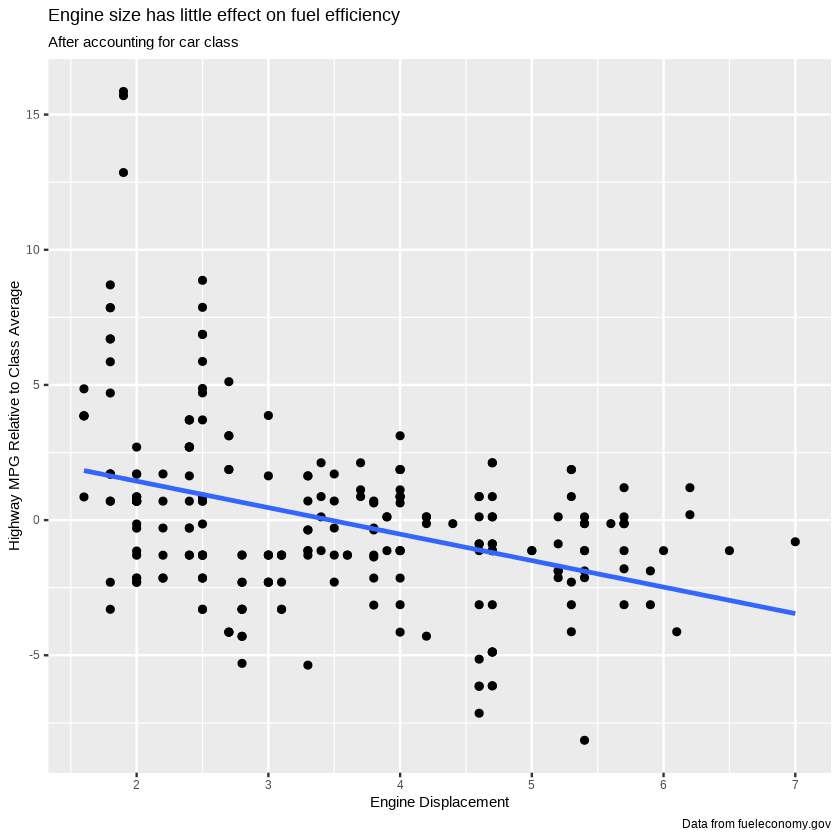

In [19]:
mod <- lm(hwy ~ class, data = mpg)
mpg %>%
  add_residuals(mod) %>%
  ggplot(aes(x = displ, y = resid)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Engine size has little effect on fuel efficiency",
    subtitle = "After accounting for car class",
    caption = "Data from fueleconomy.gov",
    y = "Highway MPG Relative to Class Average",
    x = "Engine Displacement"
  )

### 주석
### geom_text()

In [22]:
best_in_class <- mpg %>%
    group_by(class) %>%
    filter(row_number(desc(hwy)) == 1)
best_in_class %>% print

# A tibble: 7 x 11
# Groups:   class [7]
  manufacturer model       displ  year   cyl trans drv     cty   hwy fl    class
  <chr>        <chr>       <dbl> <int> <int> <chr> <chr> <int> <int> <chr> <chr>
1 chevrolet    corvette      5.7  1999     8 manu~ r        16    26 p     2sea~
2 dodge        caravan 2wd   2.4  1999     4 auto~ f        18    24 r     mini~
3 nissan       altima        2.5  2008     4 manu~ f        23    32 r     mids~
4 subaru       forester a~   2.5  2008     4 manu~ 4        20    27 r     suv  
5 toyota       toyota tac~   2.7  2008     4 manu~ 4        17    22 r     pick~
6 volkswagen   jetta         1.9  1999     4 manu~ f        33    44 d     comp~
7 volkswagen   new beetle    1.9  1999     4 manu~ f        35    44 d     subc~


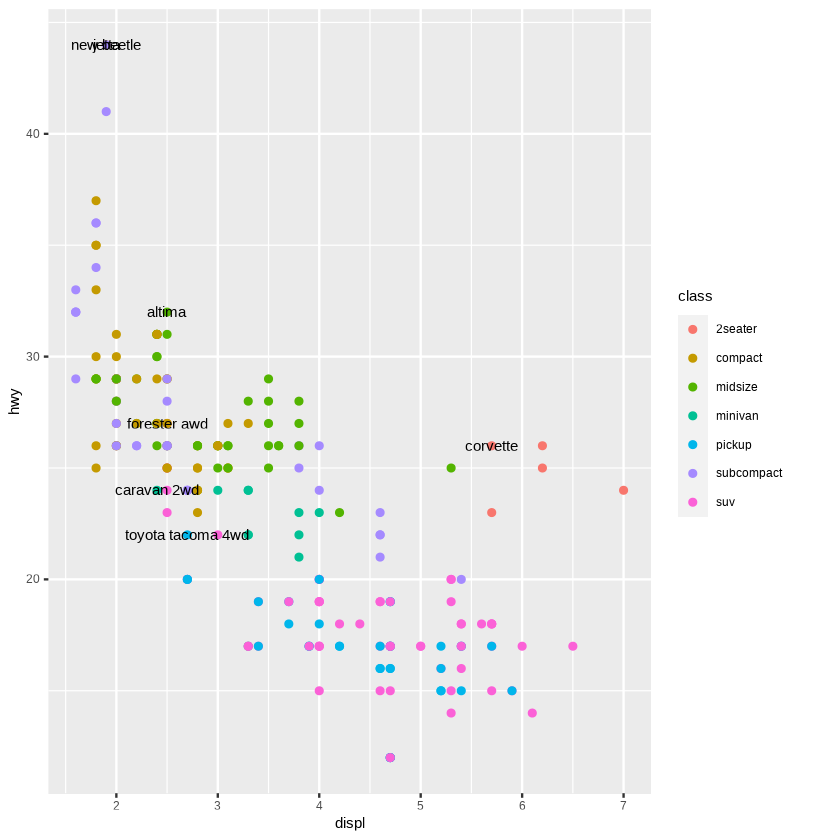

In [21]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(color = class)) + 
    geom_text(aes(label = model), data = best_in_class)

### geom_label
- label.padding : 레이블 주변 패딩 
- label.r : 모서리의 라운딩 양 
- label.size : 레이블 테두리의 크기

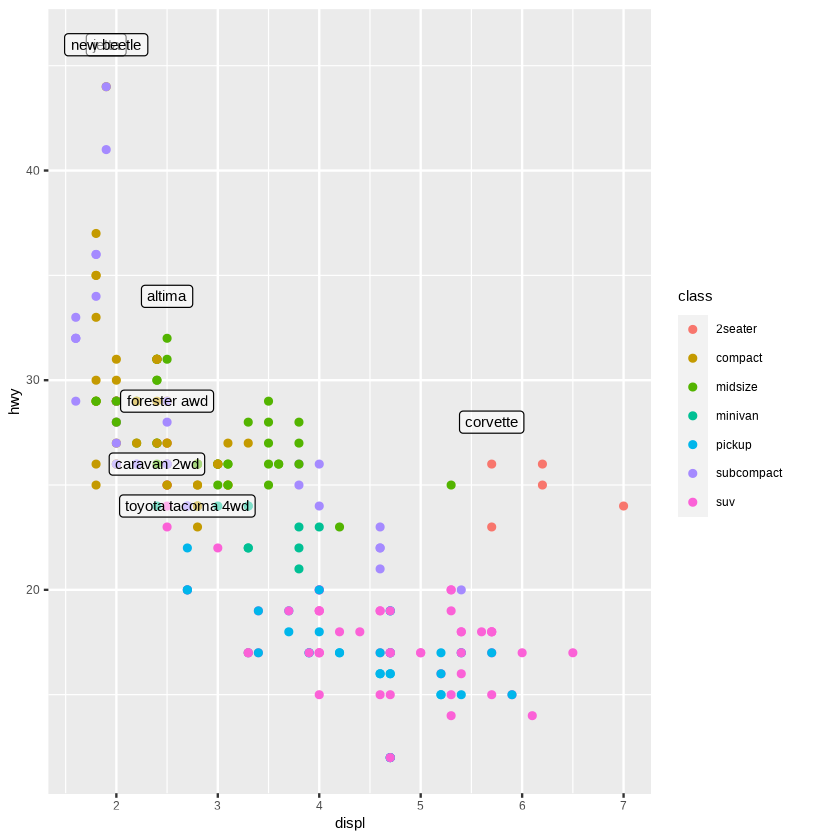

In [24]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_label(aes(label = model), data = best_in_class, nudge_y = 2, alpha = 0.5)

### ggrepel::geom_label_repel
- 라벨이 겹치지 않도록 라벨을 자동으로 조정

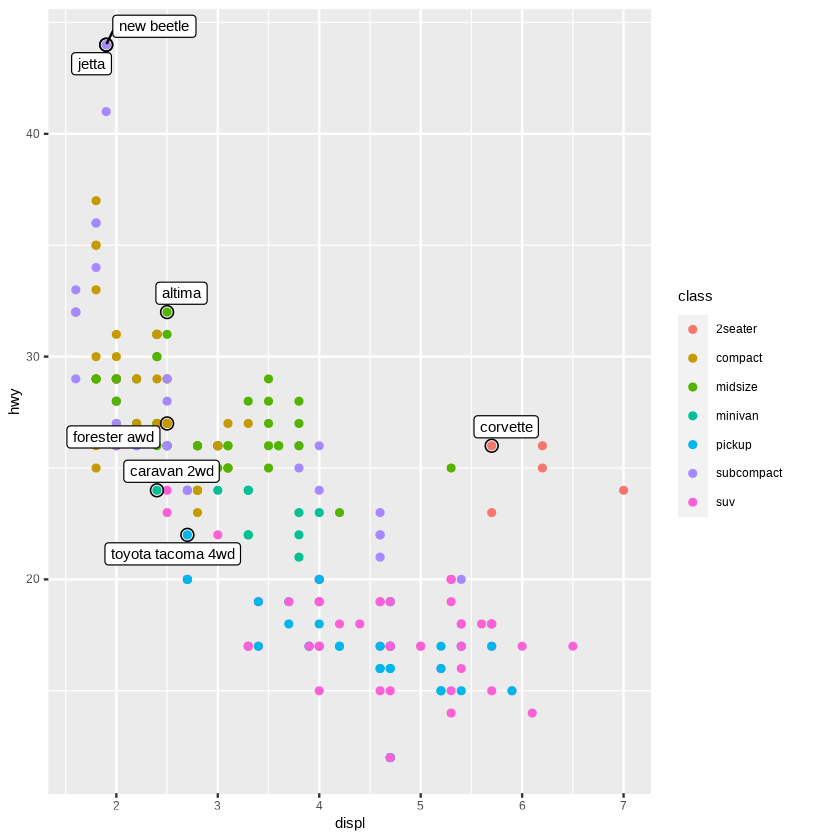

In [25]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_point(size = 3, shape = 1, data = best_in_class) +
  ggrepel::geom_label_repel(aes(label = model), data = best_in_class)

### 범례 제거
- theme(legend.position = "none)

In [26]:
class_avg <- mpg %>%
  group_by(class) %>%
  summarise(
    displ = median(displ),
    hwy = median(hwy)
  )

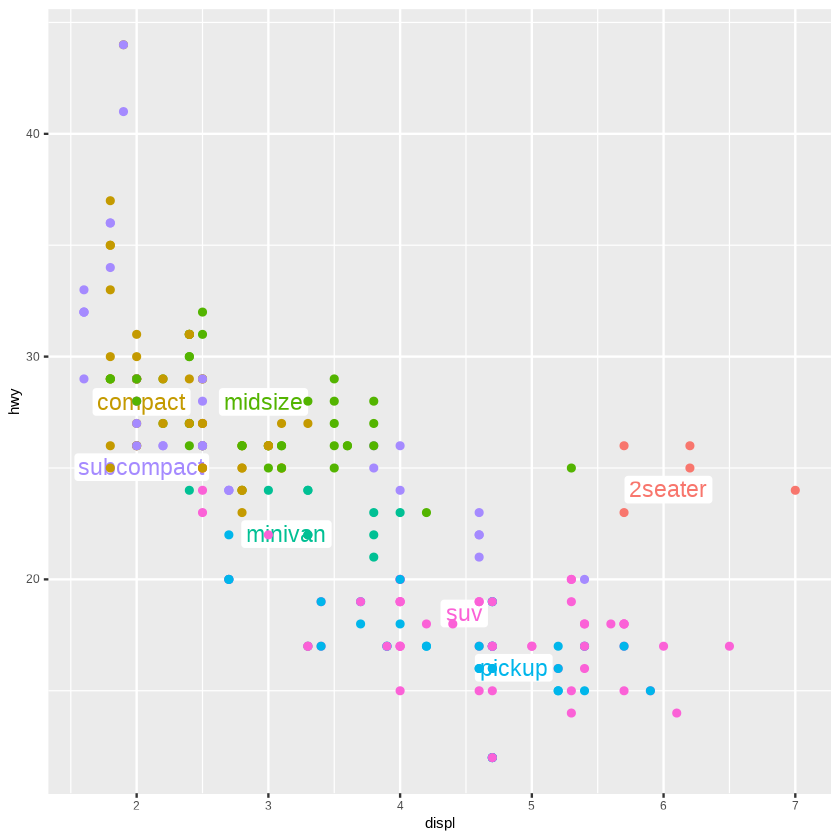

In [27]:
ggplot(mpg, aes(displ, hwy, colour = class)) +
  ggrepel::geom_label_repel(aes(label = class),
    data = class_avg,
    size = 6,
    label.size = 0,
    segment.color = NA
  ) +
  geom_point() +
  theme(legend.position = "none")

### 플롯의 모서리에 라벨을 위치시키고자 하는 경우
- 데이터프레임을 새로 만듬

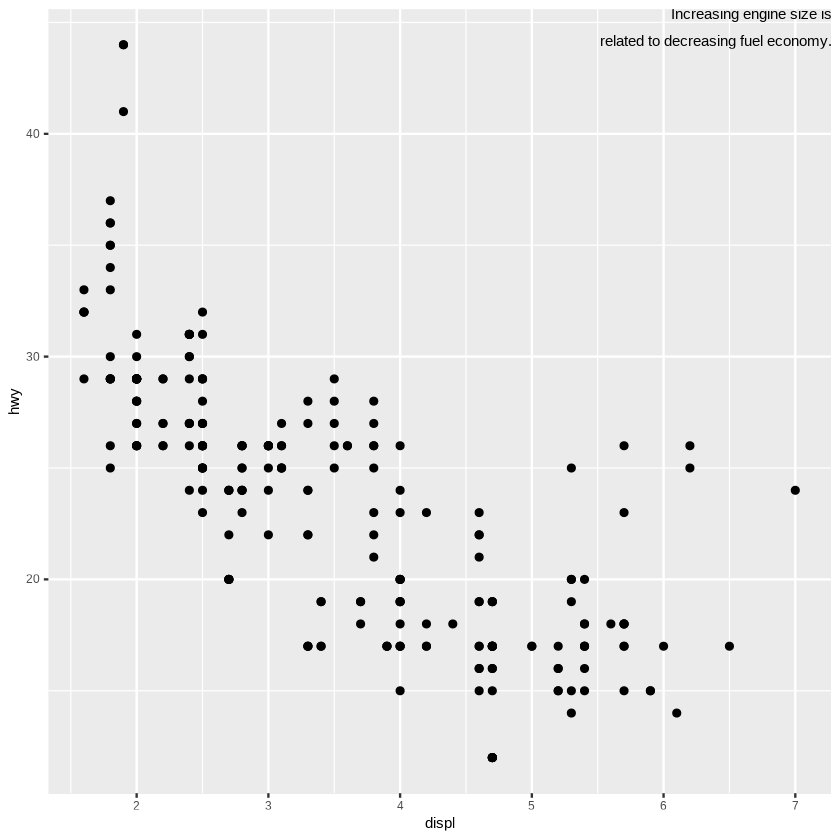

In [32]:
label <- tibble(
  displ = Inf,
  hwy = Inf,
  label = "Increasing engine size is \nrelated to decreasing fuel economy."
)

ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_text(aes(label = label), data = label, vjust = "top", hjust = "right")

### hjust
### vjust
<img src = "https://d33wubrfki0l68.cloudfront.net/9f9f1806b5c583874a725bdff526e990bd4fcba6/b955a/communicate-plots_files/figure-html/just-1.png">

- geom_hline() / geon_vline() : 참조선, (size = 두께, color = 색상)
- geom_rect() : 관심 지점 주위에 사각형 (xmin, xmax, ymin, ymax)


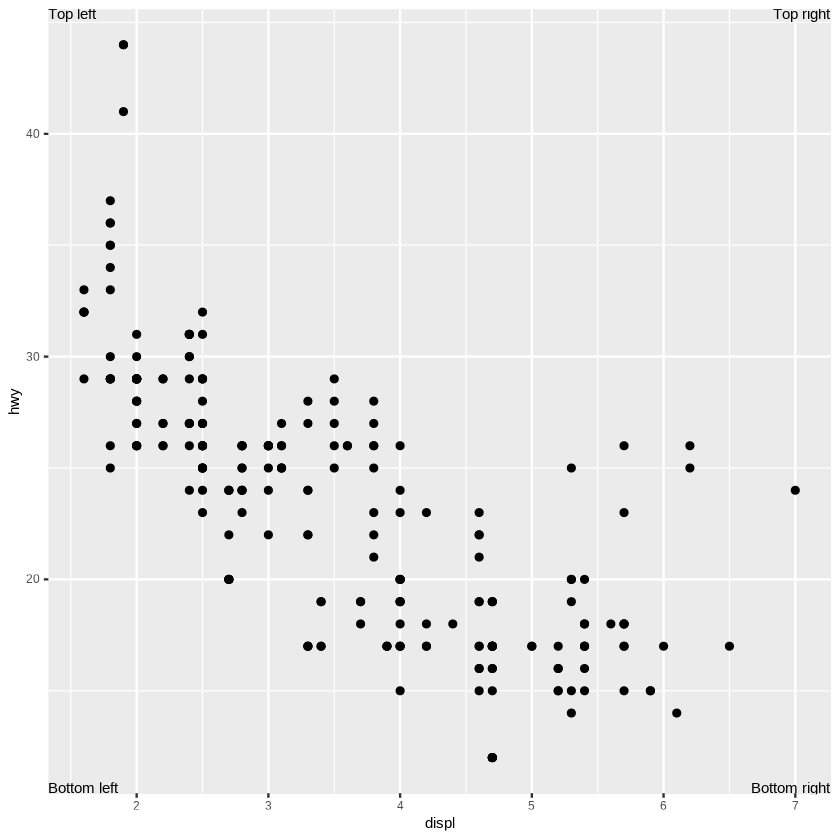

In [33]:
# 22.3.1
label <- tribble(
  ~displ, ~hwy, ~label, ~vjust, ~hjust,
  Inf, Inf, "Top right", "top", "right",
  Inf, -Inf, "Bottom right", "bottom", "right",
  -Inf, Inf, "Top left", "top", "left",
  -Inf, -Inf, "Bottom left", "bottom", "left"
)

ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_text(aes(label = label, vjust = vjust, hjust = hjust), data = label)

### annotate()

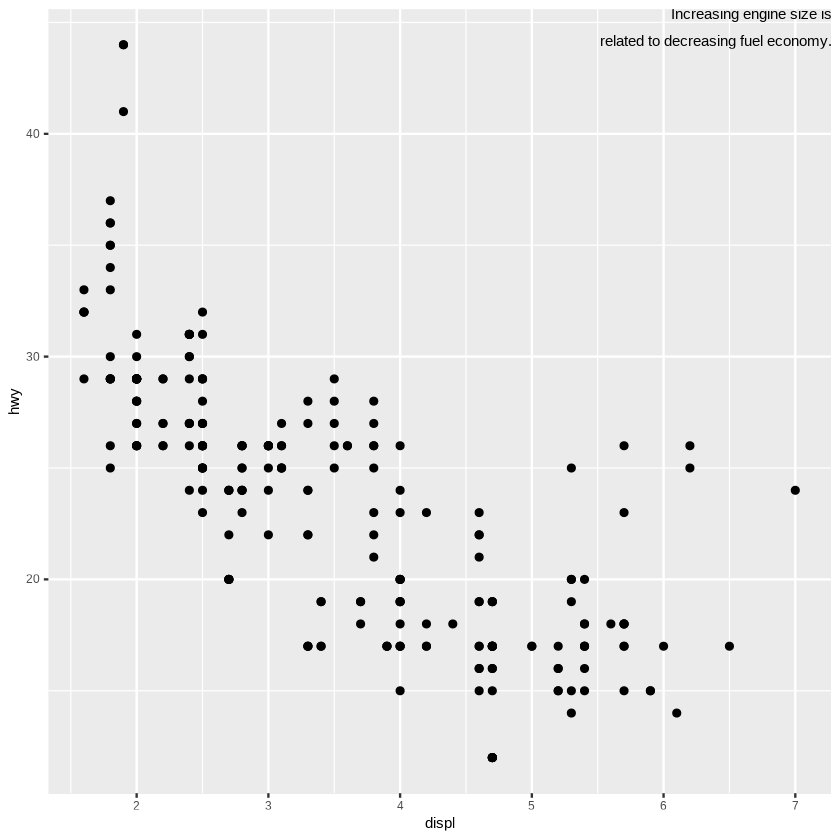

In [34]:
# 2
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  annotate("text",
    x = Inf, y = Inf,
    label = "Increasing engine size is \nrelated to decreasing fuel economy.", vjust = "top", hjust = "right"
  )

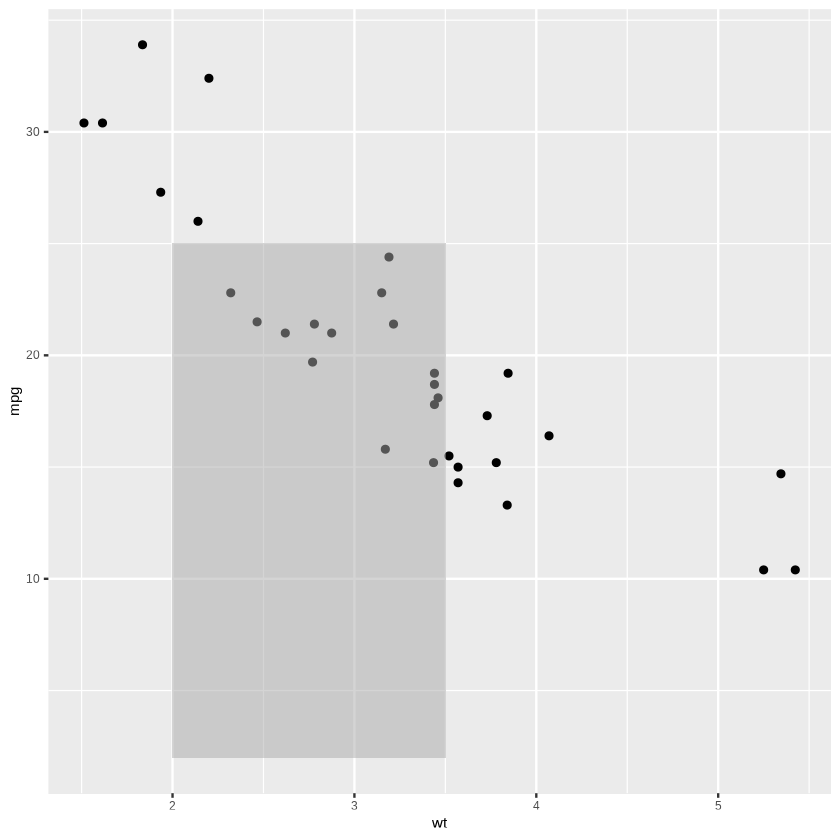

In [35]:
p <- ggplot(mtcars, aes(wt, mpg)) + geom_point()
p + annotate("rect", 
             xmin = 2, xmax = 3.5, ymin = 2, ymax = 25, 
             fill = "dark grey", alpha = 0.5)

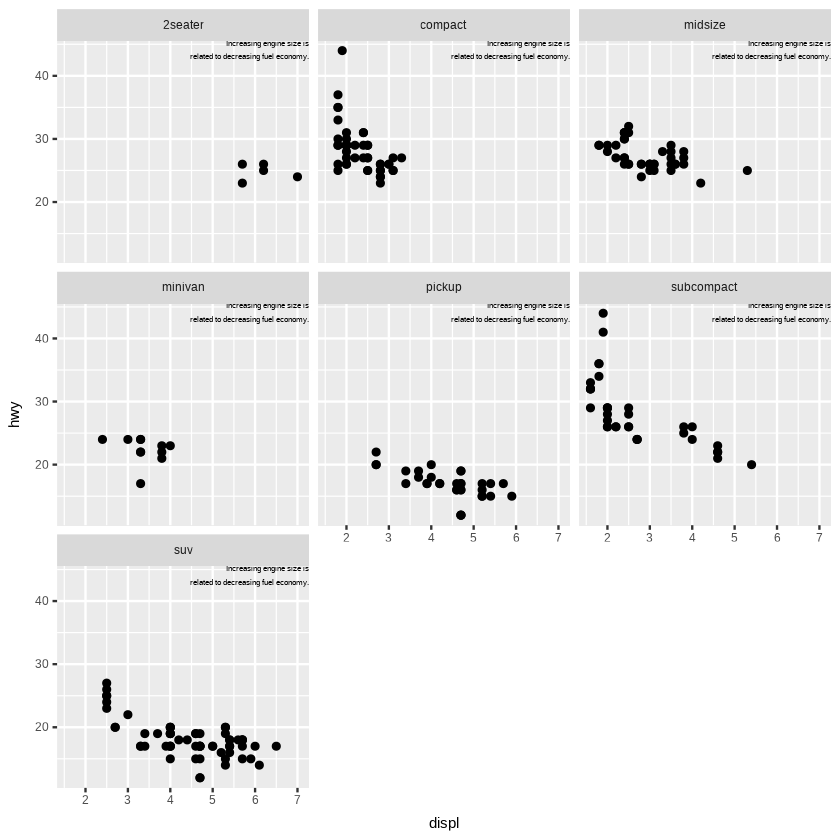

In [36]:
#3
label <- tibble(
  displ = Inf,
  hwy = Inf,
  label = "Increasing engine size is \nrelated to decreasing fuel economy."
)

ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_text(aes(label = label),
    data = label, vjust = "top", hjust = "right",
    size = 2
  ) +
  facet_wrap(~class)

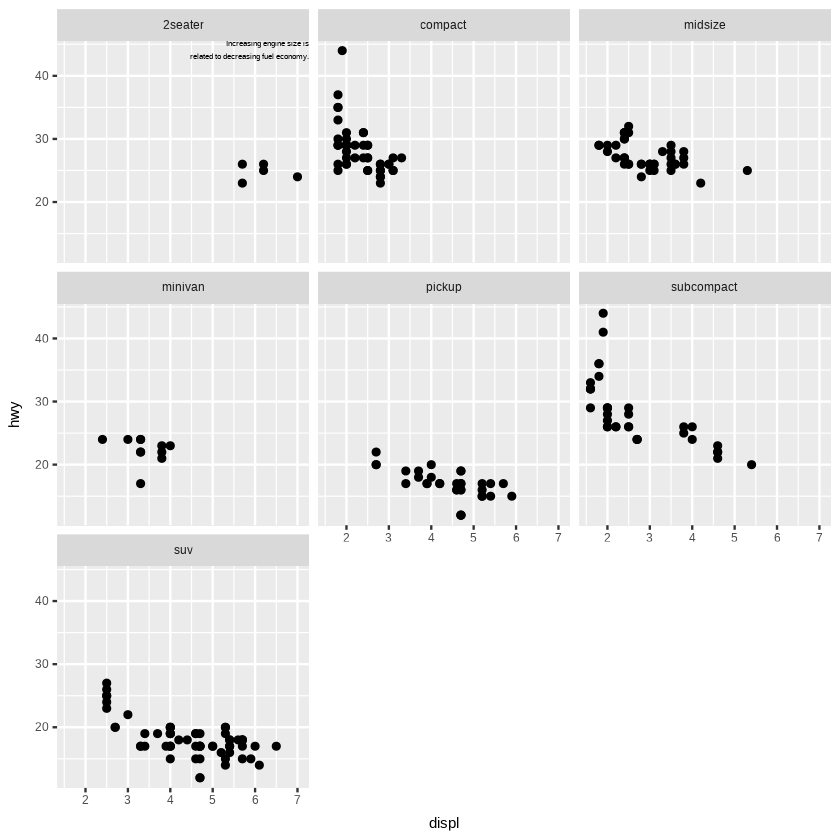

In [37]:
label <- tibble(
  displ = Inf,
  hwy = Inf,
  class = "2seater",
  label = "Increasing engine size is \nrelated to decreasing fuel economy."
)

ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_text(aes(label = label),
    data = label, vjust = "top", hjust = "right",
    size = 2
  ) +
  facet_wrap(~class)

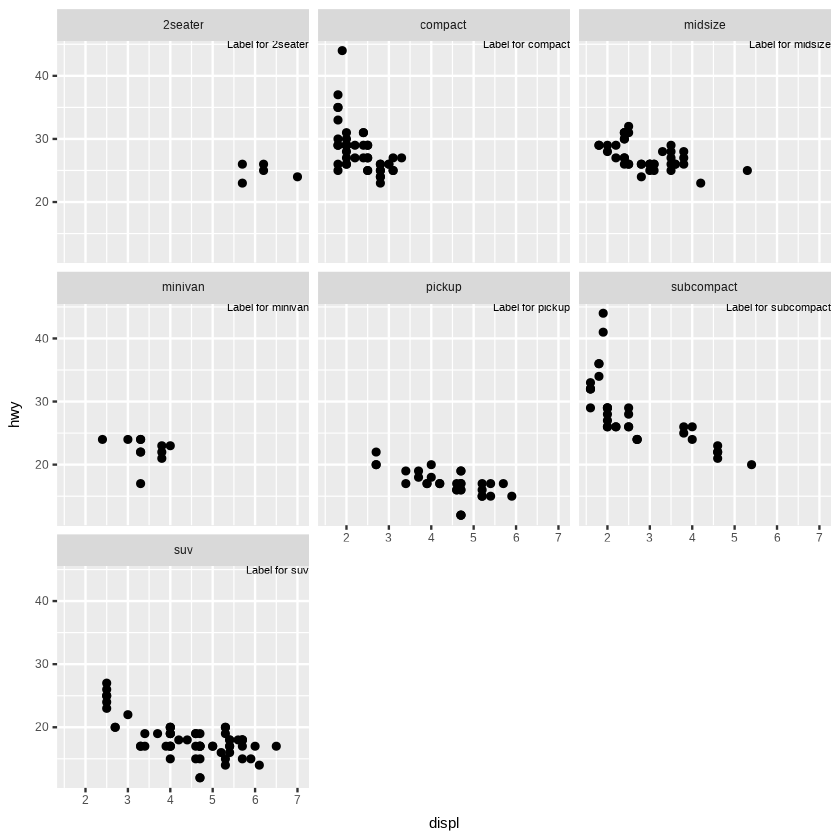

In [38]:
label <- tibble(
  displ = Inf,
  hwy = Inf,
  class = unique(mpg$class),
  label = str_c("Label for ", class)
)

ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_text(aes(label = label),
    data = label, vjust = "top", hjust = "right",
    size = 3
  ) +
  facet_wrap(~class)

### 스케일

### 축 눈금, 범례 키
### scale_x_continuous()
### scale_y_continuous()
- breaks : 눈금 간격
- labels : 눈금 이름

### scale_colour_discrete() : 범례 이름

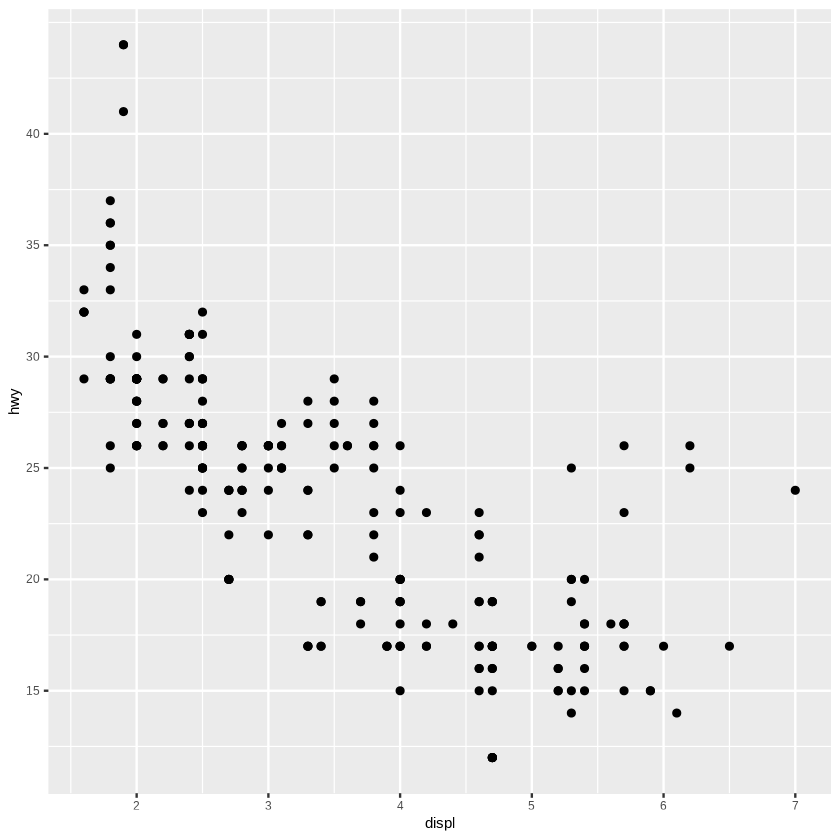

In [41]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_y_continuous(breaks = seq(15, 40, by = 5))

- 눈금 삭제

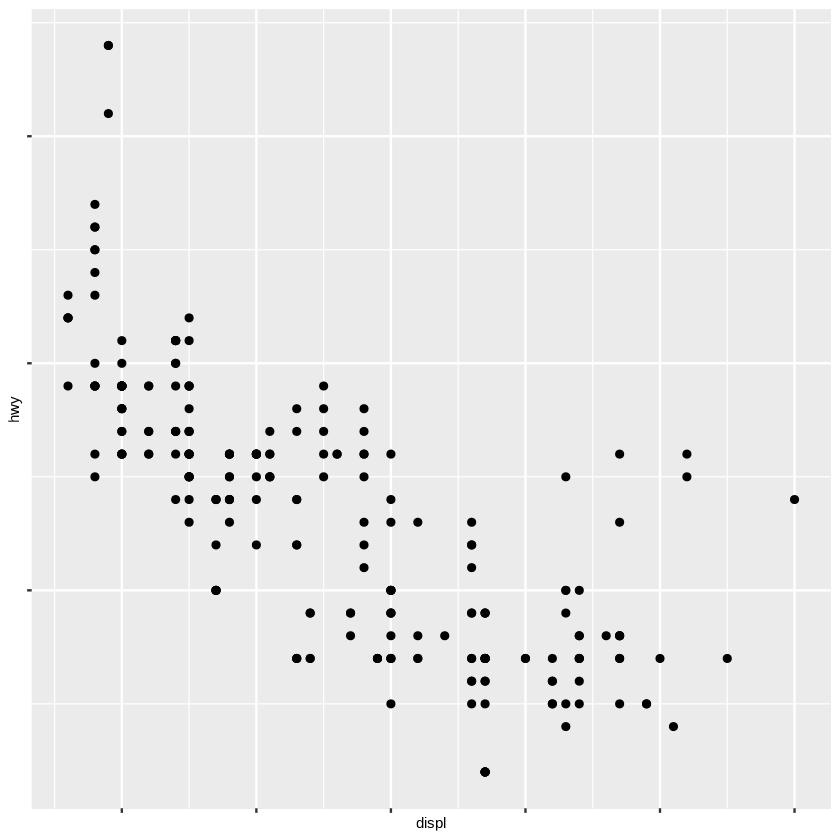

In [42]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  scale_x_continuous(labels = NULL) +
  scale_y_continuous(labels = NULL)

### 다른 범주간 비교시 스케일 공유

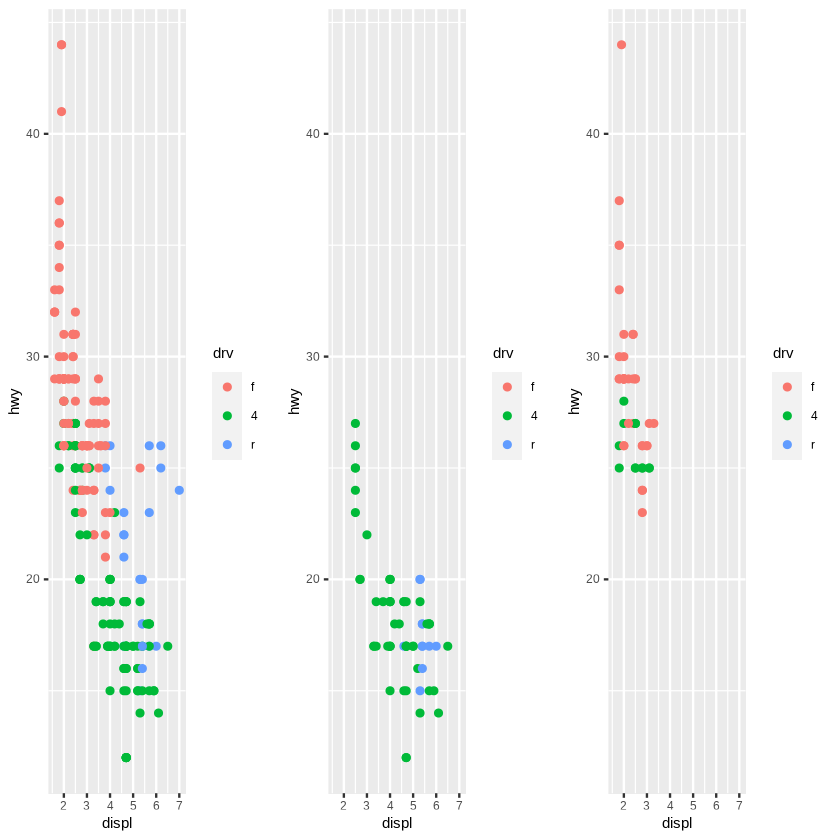

In [104]:
suv <- mpg %>% filter(class == "suv")
compact <- mpg %>% filter(class == "compact")

x_scale <- scale_x_continuous(limits = range(mpg$displ))
y_scale <- scale_y_continuous(limits = range(mpg$hwy))
col_scale <- scale_colour_discrete(limits = unique(mpg$drv))

a <- ggplot(mpg, aes(displ, hwy, colour = drv)) +
    geom_point() + 
    x_scale + y_scale + col_scale

s <- ggplot(suv, aes(displ, hwy, colour = drv)) +
  geom_point() +
  x_scale +
  y_scale +
  col_scale

c <- ggplot(compact, aes(displ, hwy, colour = drv)) +
  geom_point() +
  x_scale +
  y_scale +
  col_scale

grid.arrange(a, s, c, ncol = 3)

### geom_segment() : (arrow = 화살표, xend, yend = 끝 위치)

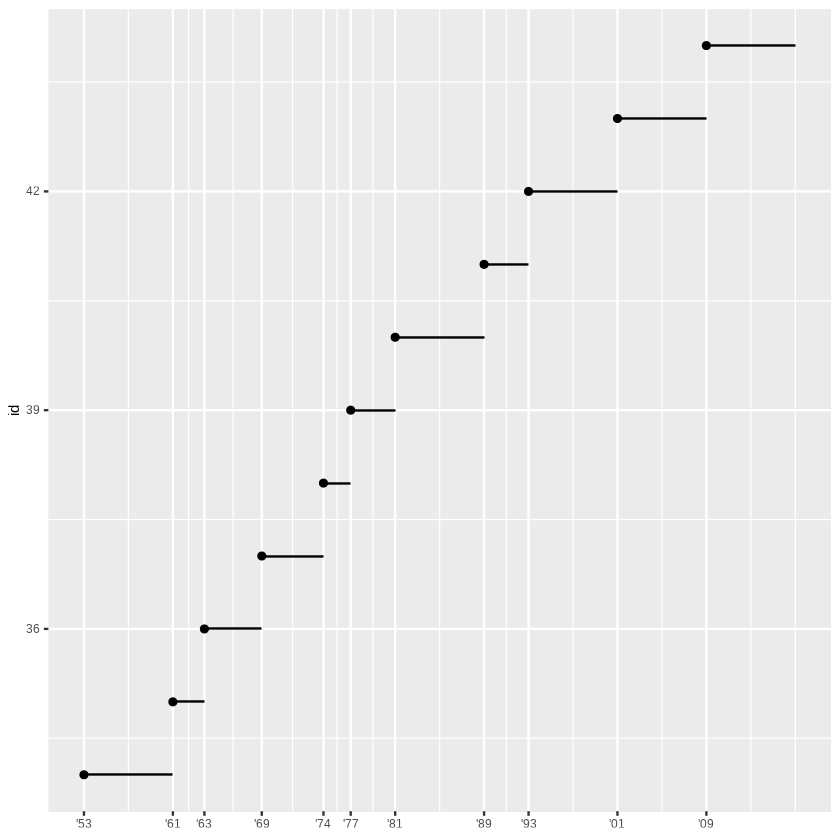

In [43]:
presidential %>%
  mutate(id = 33 + row_number()) %>%
  ggplot(aes(start, id)) +
    geom_point() +
    geom_segment(aes(xend = end, yend = id)) +
    scale_x_date(NULL, breaks = presidential$start, date_labels = "'%y")

### 범례 레이아웃
### theme()
- legend.positon : 범례 위치 ("left", "right", "bottom", "top", "none")

In [52]:
library(gridExtra)

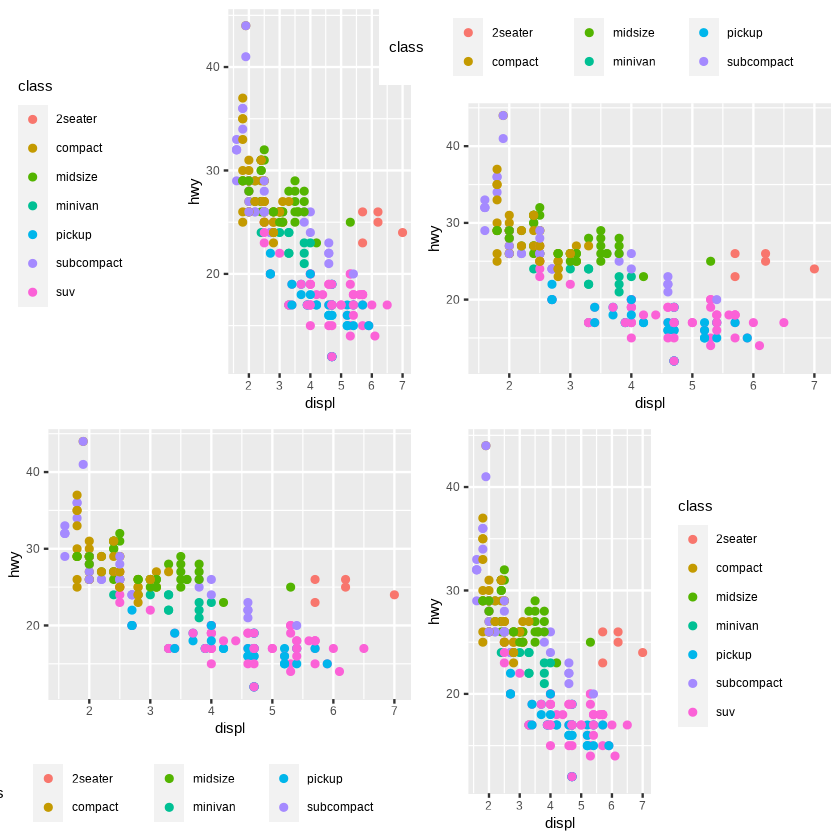

In [55]:
base <- ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class))

a <- base + theme(legend.position = "left")
b <- base + theme(legend.position = "top")
c <- base + theme(legend.position = "bottom")
d <- base + theme(legend.position = "right") 
grid.arrange(a, b, c, d, ncol = 2)

### guides() : 개별 범례 표시를 제어
- guide_legend() / guide_colorbar()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



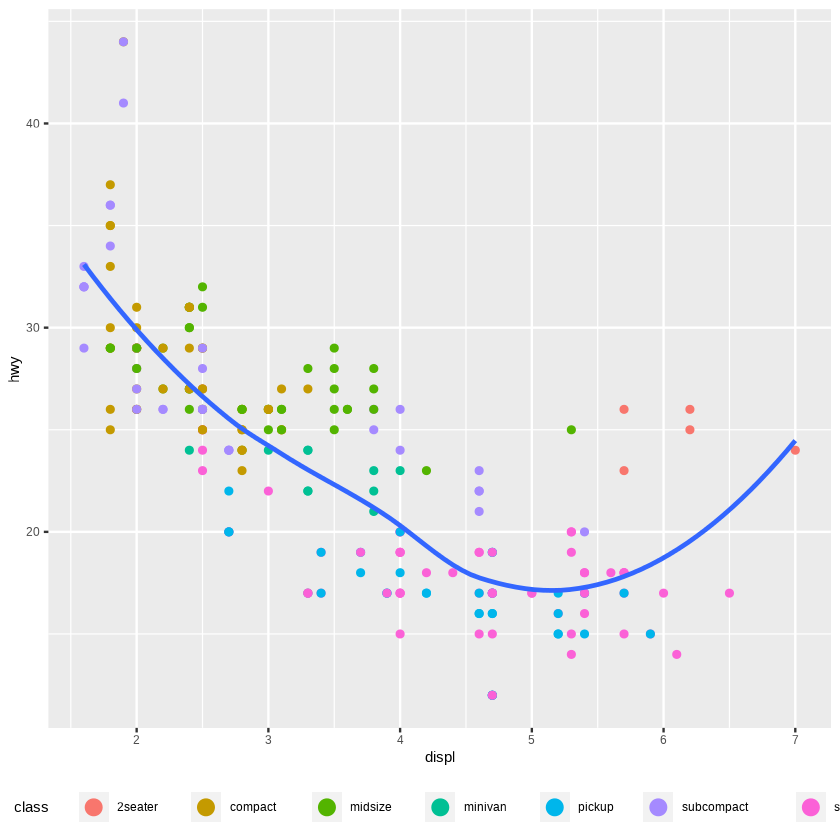

In [56]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_smooth(se = FALSE) +
  theme(legend.position = "bottom") +
  guides(colour = guide_legend(nrow = 1, override.aes = list(size = 4)))

### 스케일 교체

#### 로그 변환

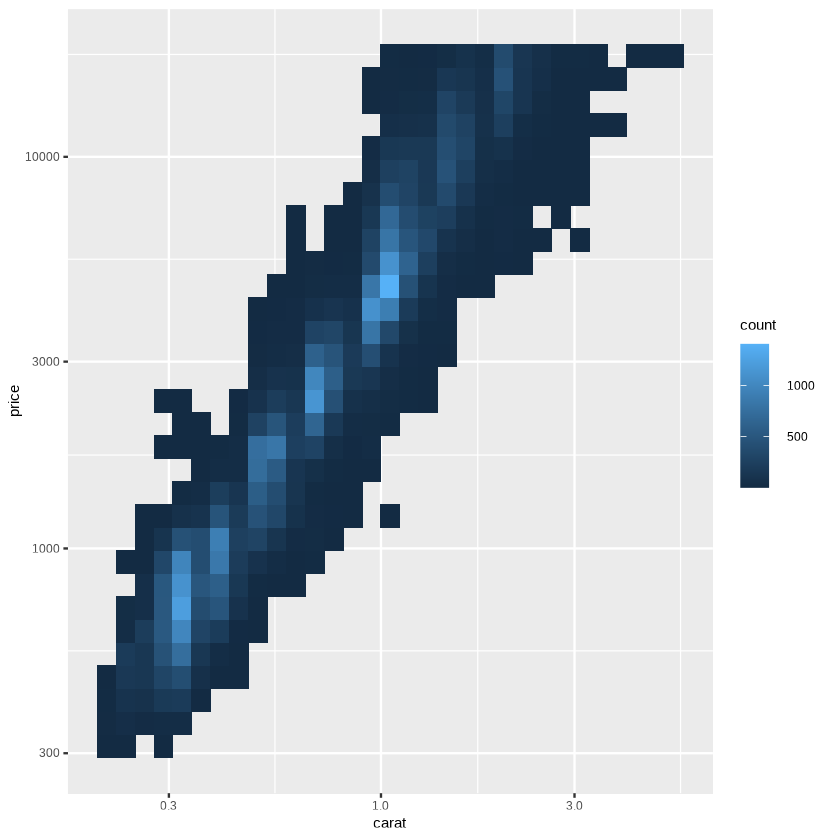

In [58]:
ggplot(diamonds, aes(carat, price)) +
  geom_bin2d() + 
  scale_x_log10() + 
  scale_y_log10()

### 색상
### scale_color_brewer(pallette = " ")
<img src = "https://d33wubrfki0l68.cloudfront.net/7d062b5e13b7d32f8c4958af95856b1b210aa436/4d3b4/communicate-plots_files/figure-html/brewer-1.png">

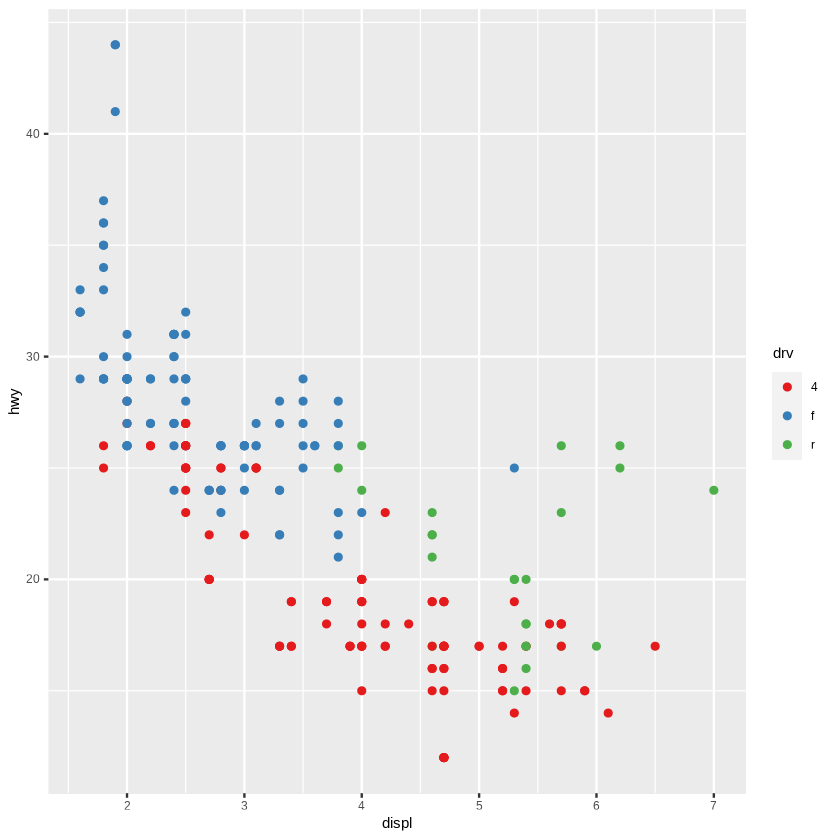

In [62]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = drv)) +
  scale_colour_brewer(palette = "Set1")

### 모양 변경
### geom_point(aes(shape = " "))

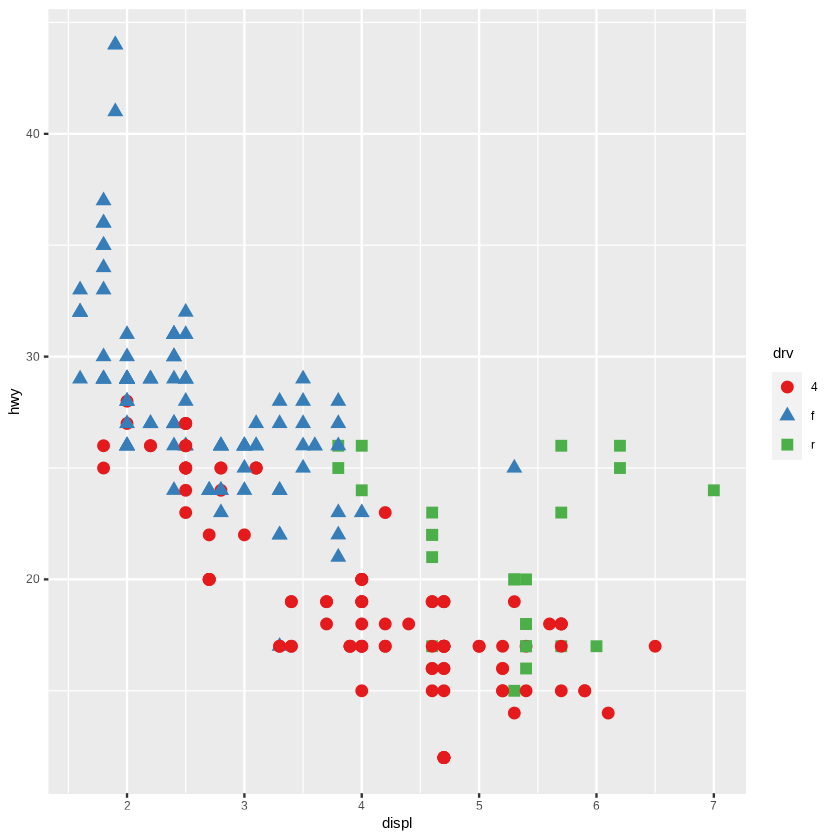

In [65]:
ggplot(mpg, aes(displ, hwy)) + 
    geom_point(aes(color = drv, shape = drv), size = 3) +
    scale_color_brewer(palette = 'Set1')

### scale_color_manual() : 미리 색상을 정의

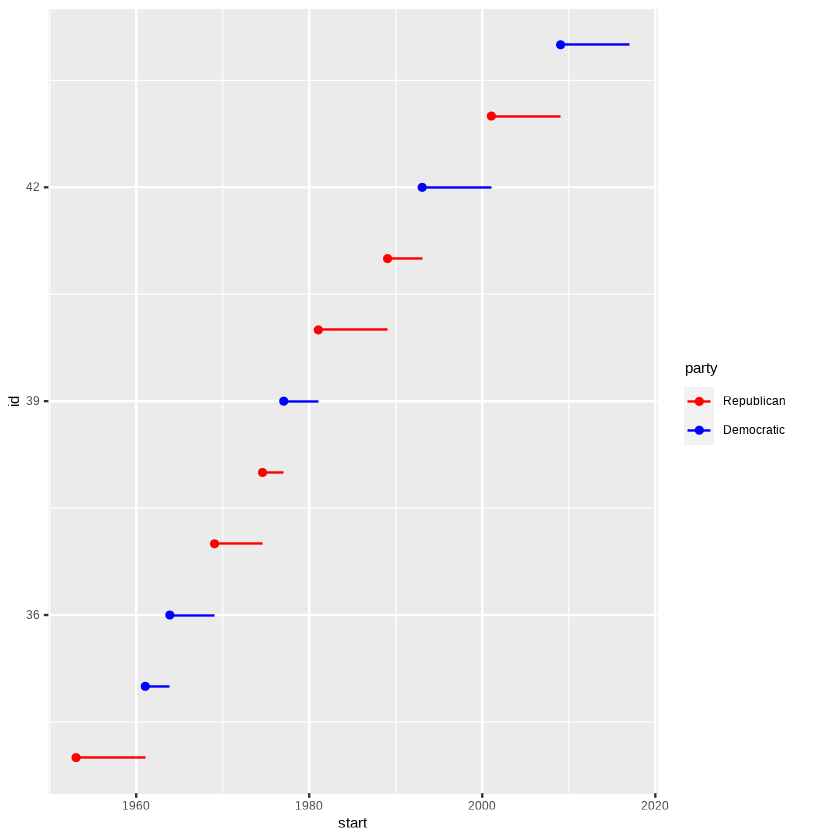

In [66]:
presidential %>%
  mutate(id = 33 + row_number()) %>%
  ggplot(aes(start, id, colour = party)) +
    geom_point() +
    geom_segment(aes(xend = end, yend = id)) +
    scale_colour_manual(values = c(Republican = "red", Democratic = "blue"))

### 연속형 색상
### viridis::scale_fill_viridis()

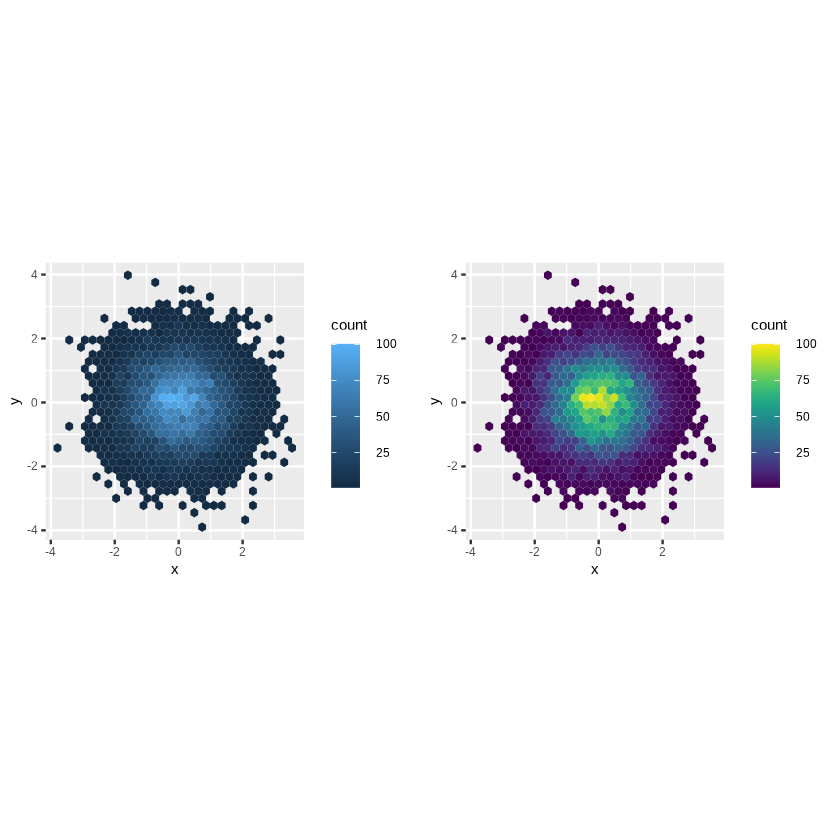

In [68]:
df <- tibble(
  x = rnorm(10000),
  y = rnorm(10000)
)
a <- ggplot(df, aes(x, y)) +
  geom_hex() +
  coord_fixed()

b <- ggplot(df, aes(x, y)) +
  geom_hex() +
  viridis::scale_fill_viridis() +
  coord_fixed()

grid.arrange(a, b, ncol = 2)

### scale_fill_gradient()

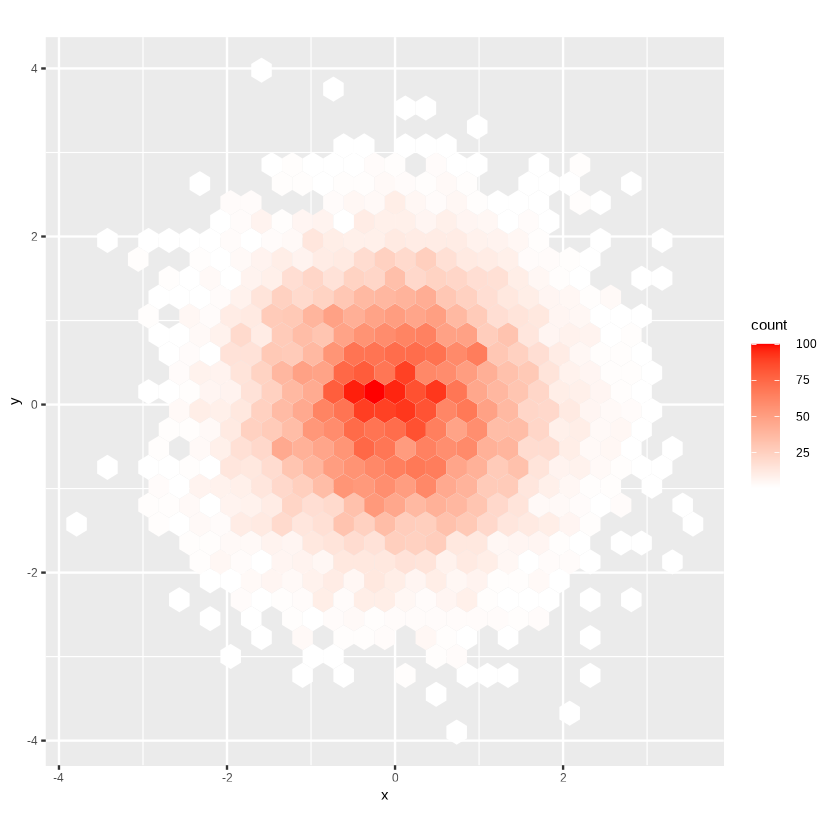

In [69]:
ggplot(df, aes(x, y)) +
  geom_hex() +
  scale_fill_gradient(low = "white", high = "red") +
  coord_fixed()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



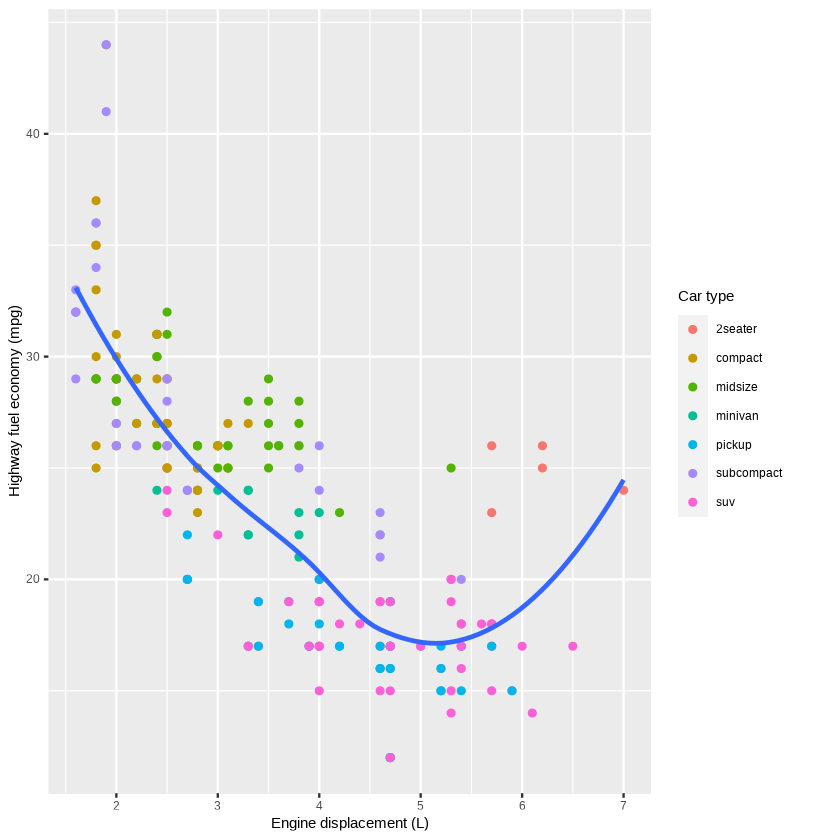

In [70]:
# 22.4.4
# 2
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_smooth(se = FALSE) +
  labs(
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    colour = "Car type"
  )

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



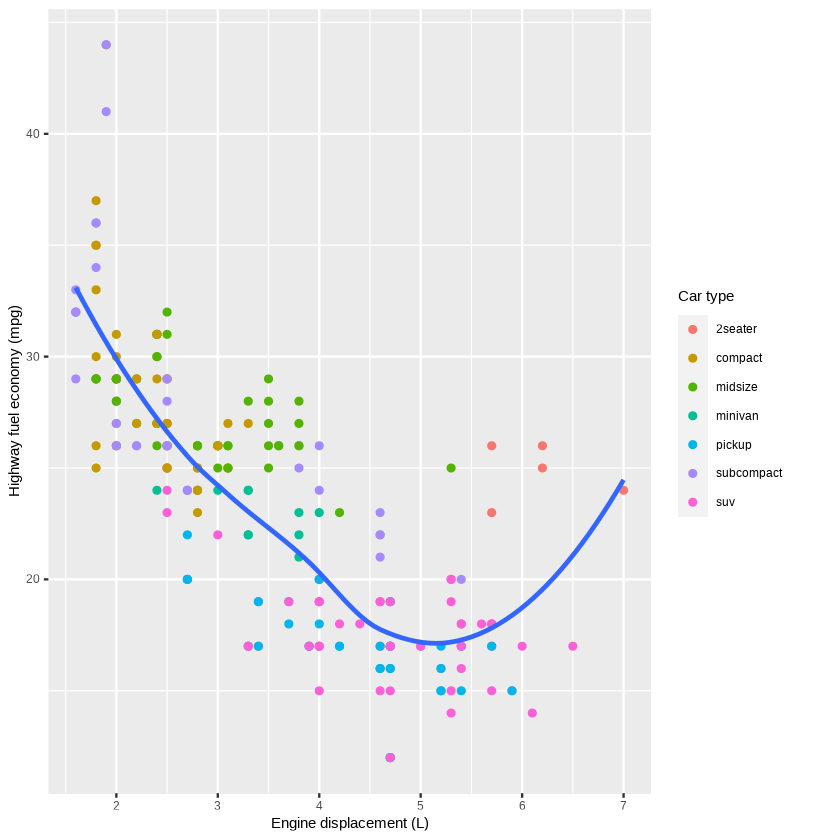

In [71]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_smooth(se = FALSE) +
  scale_x_continuous("Engine displacement (L)") +
  scale_y_continuous("Highway fuel economy (mpg)") +
  scale_colour_discrete("Car type")

In [91]:
make_date(seq(year(min(presidential$start)), year(min(presidential$end)), 4))

[1] "1953-01-01" "1957-01-01" "1961-01-01"

In [92]:
# 3
library(lubridate)
fouryears <- lubridate::make_date(seq(
    year(min(presidential$start)),
    year(max(presidential$end)),
    by = 4
), 1, 1)
fouryears

[1] "1953-01-01" "1957-01-01" "1961-01-01" "1965-01-01" "1969-01-01"
 [6] "1973-01-01" "1977-01-01" "1981-01-01" "1985-01-01" "1989-01-01"
[11] "1993-01-01" "1997-01-01" "2001-01-01" "2005-01-01" "2009-01-01"
[16] "2013-01-01" "2017-01-01"

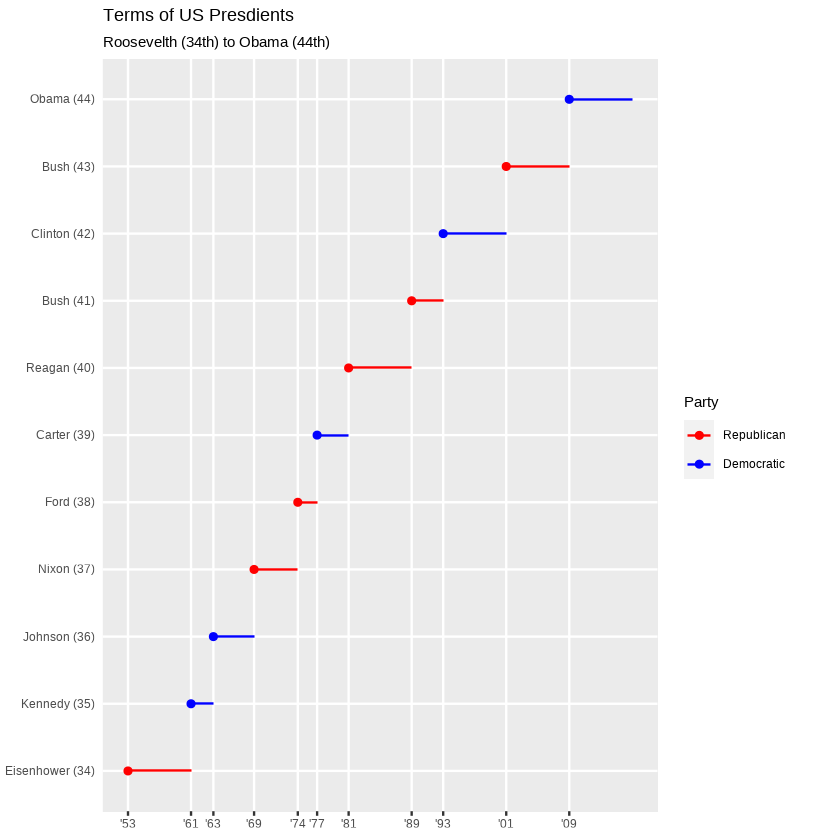

In [93]:
presidential %>%
  mutate(
    id = 33 + row_number(),
    name_id = fct_inorder(str_c(name, " (", id, ")"))
  ) %>%
  ggplot(aes(start, name_id, colour = party)) +
  geom_point() +
  geom_segment(aes(xend = end, yend = name_id)) +
  scale_colour_manual("Party", values = c(Republican = "red", Democratic = "blue")) +
  scale_y_discrete(NULL) +
  scale_x_date(NULL,
    breaks = presidential$start, date_labels = "'%y",
    minor_breaks = fouryears
  ) +
  ggtitle("Terms of US Presdients",
    subtitle = "Roosevelth (34th) to Obama (44th)"
  ) +
  theme(
    panel.grid.minor = element_blank(),
    axis.ticks.y = element_blank()
  )

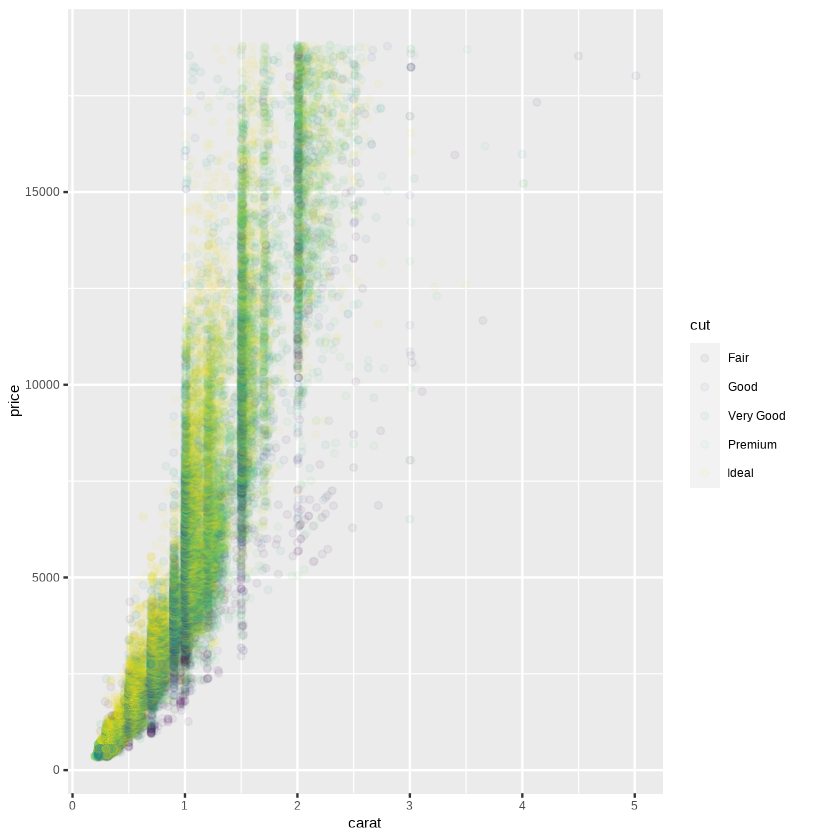

In [94]:
# 4
ggplot(diamonds, aes(carat, price)) +
  geom_point(aes(colour = cut), alpha = 1/20)

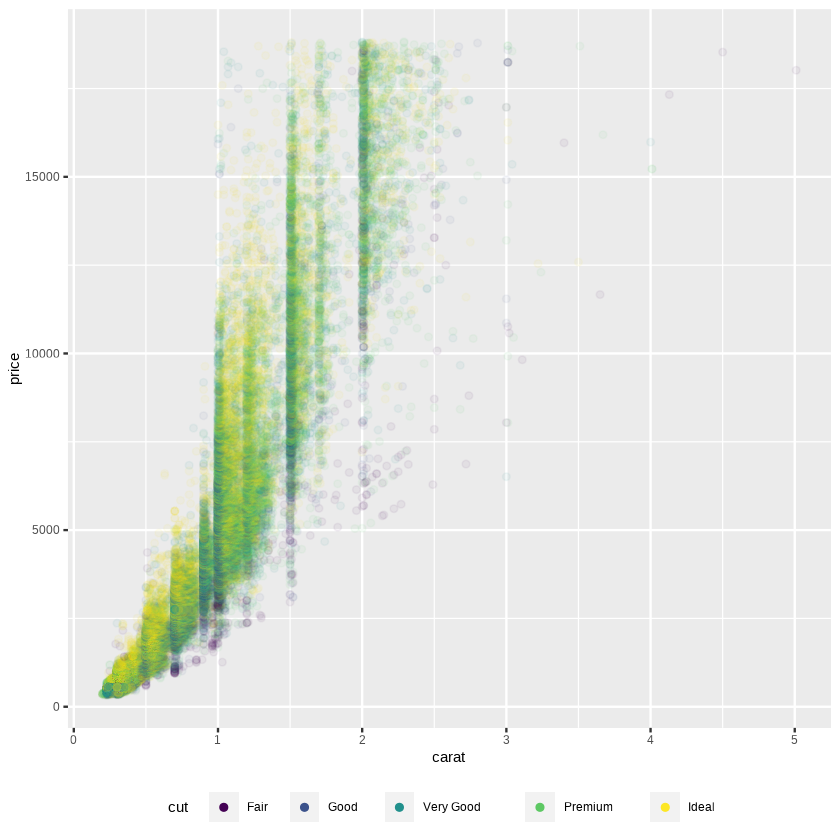

In [95]:
ggplot(diamonds, aes(carat, price)) +
  geom_point(aes(colour = cut), alpha = 1 / 20) +
  theme(legend.position = "bottom") +
  guides(colour = guide_legend(nrow = 1, override.aes = list(alpha = 1)))

### 확대 & 축소
### coord_cartesian(xlim = c(), ylim = c())

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



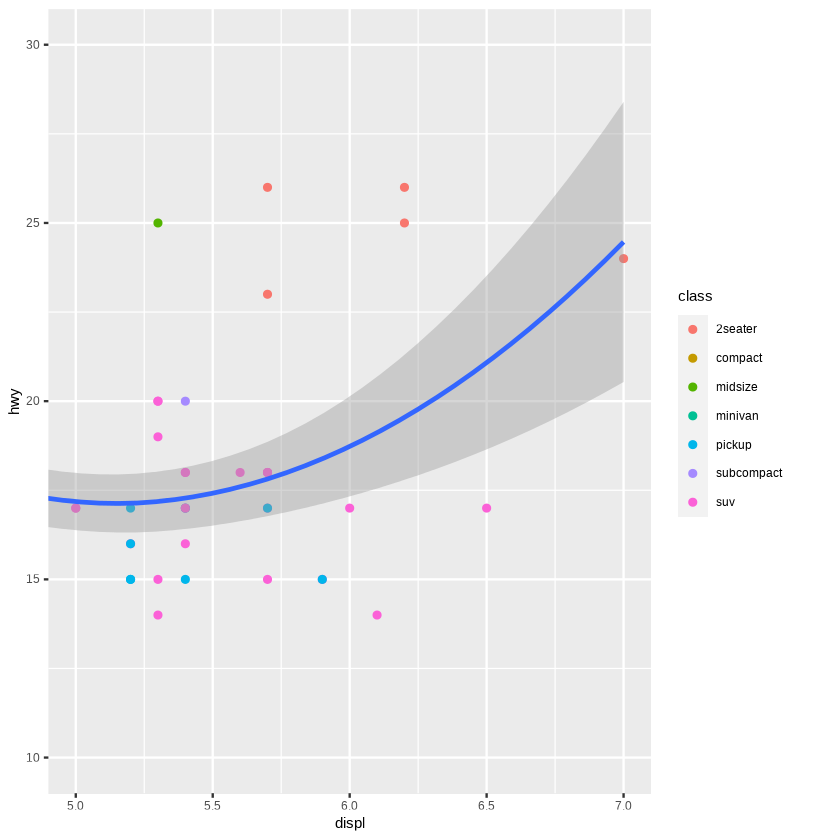

In [100]:
ggplot(mpg, mapping = aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth() +
  coord_cartesian(xlim = c(5, 7), ylim = c(10, 30))


### 테마
<img src = "https://d33wubrfki0l68.cloudfront.net/6be25cfb939e69d72df9fbc68e7a0334e1febefe/10e92/images/visualization-themes.png">

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



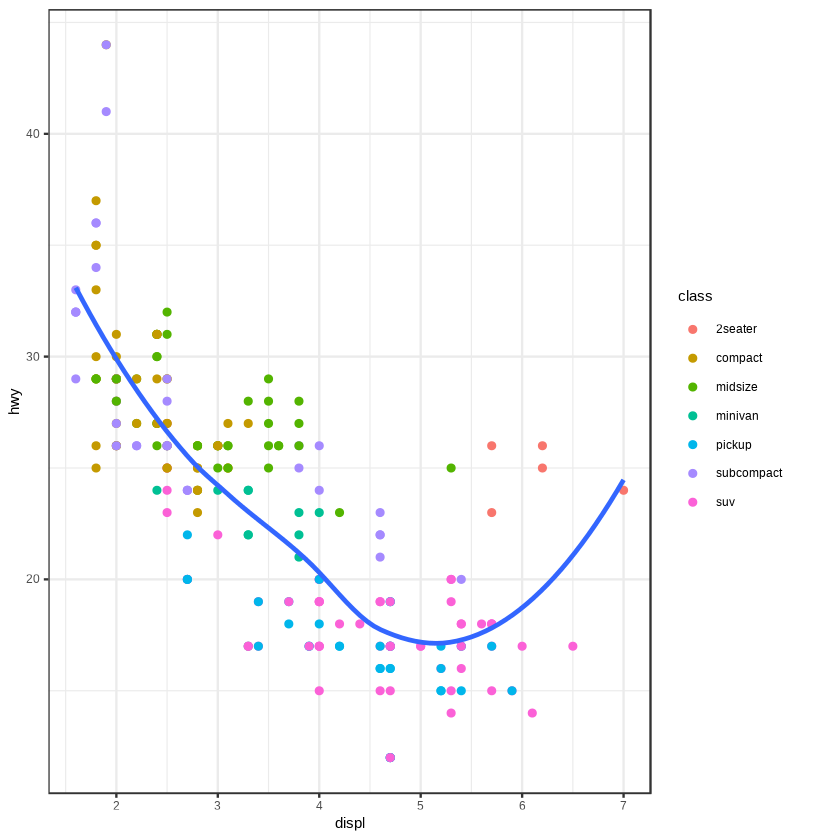

In [105]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  theme_bw()

- 자유 편집 테마

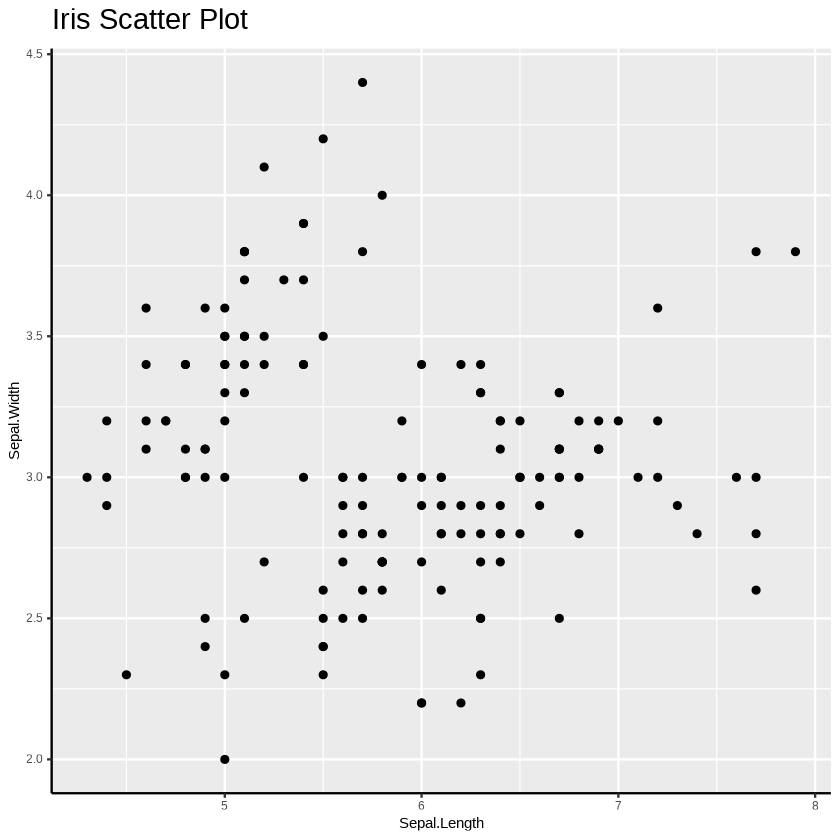

In [108]:
gg <- ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width)) 
gg + labs(title = "Iris Scatter Plot") +  # 제목
  geom_point() + 
  theme(plot.title = element_text(size = rel(2)),  # 제목 크기
        axis.line.x.bottom = element_line(color = "black"),  # x축 색
        axis.line.y.left = element_line(color = "black"))  # y축 색

### 플롯 저장

In [106]:
ggsave("my-plot.pdf")

Saving 6.67 x 6.67 in image

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



In [107]:
getwd()

[1] "C:/Users/이찬솔/Desktop/숭실/R/Data Science"